# Milestone 1 - EDA and Preprocessing data 

# 0 - Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
from sklearn.neighbors import LocalOutlierFactor
import requests

## Lookup Table Setup

In [2]:
lookup_v2 = pd.DataFrame(columns=["Feature","Original Value","Imputed/Encoded"])

In [3]:
def insert_record_into_lookup(feature,old_value,new_value):
    """
    Insert new row into lookup_table
    
    Parameters
    __________
    feature (str): feature name
    old_value (str): old_value to be replaced
    new_value (str): new_value to replace old_value

    """
    lookup_v2.loc[len(lookup_v2)] = [feature,old_value,new_value]

# 1 - Extraction

In [4]:
dataset_name = "2011_Accidents_UK"
df_raw = pd.read_csv(f"data/{dataset_name}.csv")

/shared-libs/python3.10/py-core/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_accidents = df_raw.copy()
df_accidents.set_index("accident_index",inplace=True)

# 2- EDA

In [6]:
df_accidents.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,01BS70001,525590.0,178980.0,-0.192203,51.495766,Metropolitan Police,Slight,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812
201101BS70002,2011,01BS70002,527450.0,179020.0,-0.165408,51.495710,Metropolitan Police,Serious,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819
201101BS70003,2011,01BS70003,527120.0,178350.0,-0.170401,51.489763,Metropolitan Police,Slight,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914
201101BS70005,2011,01BS70005,525400.0,179210.0,-0.194856,51.497875,Metropolitan Police,Slight,2,3,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813
201101BS70007,2011,01BS70007,526280.0,177540.0,-0.182783,51.482671,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913


In [7]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151474 entries, 201101BS70001 to 2011984147811
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                151474 non-null  int64  
 1   accident_reference                           151474 non-null  object 
 2   location_easting_osgr                        151474 non-null  float64
 3   location_northing_osgr                       151474 non-null  float64
 4   longitude                                    151474 non-null  float64
 5   latitude                                     151474 non-null  float64
 6   police_force                                 151474 non-null  object 
 7   accident_severity                            151474 non-null  object 
 8   number_of_vehicles                           151474 non-null  int64  
 9   number_of_casualties                         

Observing All Columns Features Observations

In [8]:
def show_features_values(df):
    """
    For all Features in a data frame datialed detiails of its observations are printed
    Parameters
    __________
    df (pd.DataFrame): data frame to be reported

    Return
    ______
    None
    """
    features = list(df.columns)
    features.sort()
    print("Features: ",features)
    for col in features:
        print("_____________________________________________")
        print("_____________________________________________")

        values = df[col].value_counts()
        
        print("Feature: ",col)

        print("Feature Unique Values: ")
        print(df[col].unique())
        
        print("Number of Unique Values: ", len(values))
        print("Total count of values: ", values.sum())
        print(values)


In [9]:
show_features_values(df_accidents)

Features:  ['accident_reference', 'accident_severity', 'accident_year', 'carriageway_hazards', 'date', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'first_road_class', 'first_road_number', 'junction_control', 'junction_detail', 'latitude', 'light_conditions', 'local_authority_district', 'local_authority_highway', 'local_authority_ons_district', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'lsoa_of_accident_location', 'number_of_casualties', 'number_of_vehicles', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'police_force', 'road_surface_conditions', 'road_type', 'second_road_class', 'second_road_number', 'special_conditions_at_site', 'speed_limit', 'time', 'trunk_road_flag', 'urban_or_rural_area', 'weather_conditions']
_____________________________________________
_____________________________________________
Feature:  accident_reference
Feature Unique Values: 
['01BS70001' '01BS70002' '01BS70003' ... '984146011' '98

### How does the speed limit of a road have an effect on the number of accidents that happened on it? 

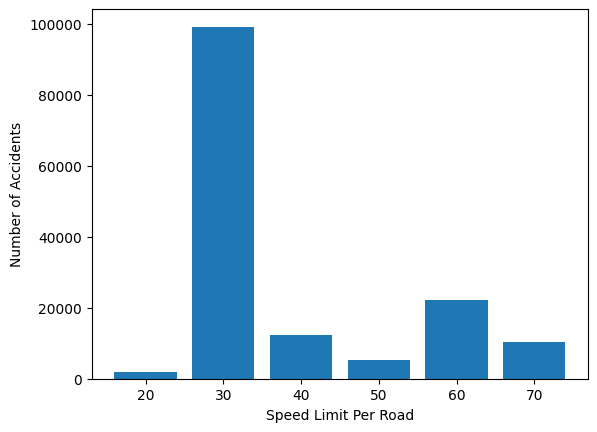

In [10]:
accidents_per_speed_limit = df_accidents['speed_limit'].value_counts()
plt.bar(accidents_per_speed_limit.index,accidents_per_speed_limit,width=8)
plt.xlabel('Speed Limit Per Road')
plt.ylabel('Number of Accidents')
plt.plot();

Majority of accidents happened on roads with a speed limit equal to 30. This may happen because the majority of roads in UK have a limit of 30

### What is the distribution of accidents over different times of the day?

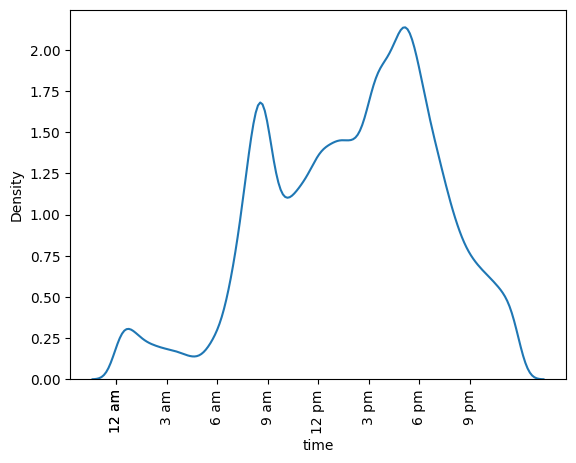

In [11]:
# from datetime import datetime
format_data='%H:%M'
df_acc_copy=df_accidents.copy()
datetimes=pd.to_datetime(df_acc_copy['time'],format=format_data)
df_acc_copy['time']=datetimes
thr=['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00']
x=pd.to_datetime(thr,format=format_data)
sns.kdeplot(df_acc_copy['time'])
plt.xticks(rotation=90)
plt.xticks(ticks=x,labels=['12 am','3 am','6 am','9 am','12 pm','3 pm','6 pm','9 pm','12 am'])
plt.show()

2 peaks are noticable between 7 and 9 am and between 4 and 6 pm which are probably during the rush hours in the UK.

### What is the number of accidents per month?

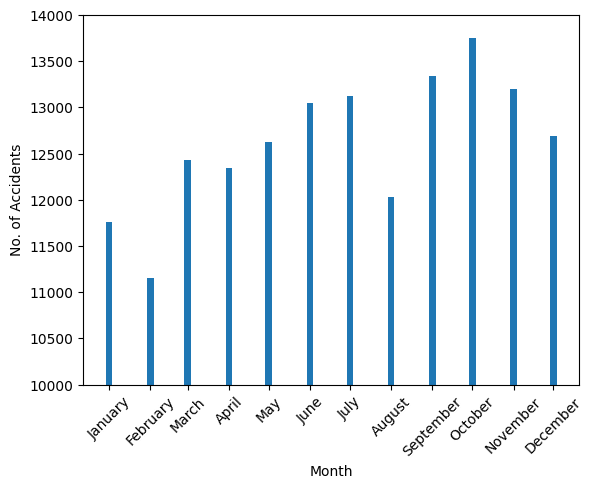

In [12]:
format_data='%m/%Y'
months=[]
for x in df_acc_copy['date']:
  y=x.split('/')
  months.append(y[1]+'/'+y[2])
datetimes=pd.to_datetime(months,format=format_data)
df_acc_copy['month']=datetimes
accidents_per_month=df_acc_copy['month'].value_counts()
plt.bar(accidents_per_month.index,accidents_per_month,width=5)
thr=['2011-01-01','2011-02-01','2011-03-01','2011-04-01','2011-05-01','2011-06-01','2011-07-01','2011-08-01','2011-09-01','2011-10-01','2011-11-01','2011-12-01']
datetimes=pd.to_datetime(thr,format='%Y-%m-%d')
plt.xticks(rotation=45, ticks=datetimes,labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('No. of Accidents')
plt.ylim(10000,14000)
plt.show()

Accidents increase rapidly in October, while for other months they maintain a similar pattern

### What is the trend of each severity throughout the year?

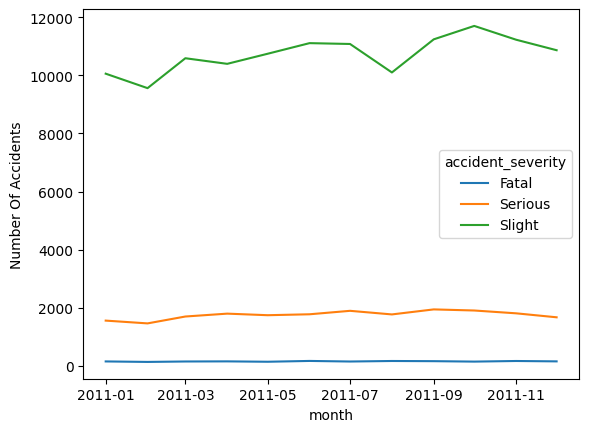

In [13]:
df_temp = df_acc_copy[["month","accident_severity","accident_reference"]].copy()
df_temp = pd.DataFrame(df_temp.groupby(["accident_severity","month"],as_index = False)["accident_reference"].count()).sort_values(["accident_severity","month"])
df_temp.columns = ["accident_severity","month","Number Of Accidents"]
sns.lineplot(data =df_temp,x = "month",y = "Number Of Accidents",hue = "accident_severity");

This plot shows the number of accidents per month based on accident severity. We can infer that the number of accidents does not get impacted by the months except for the slight accidents which increases in October and decreases in February. 

### What is the number of accidents that happened in each junction type?

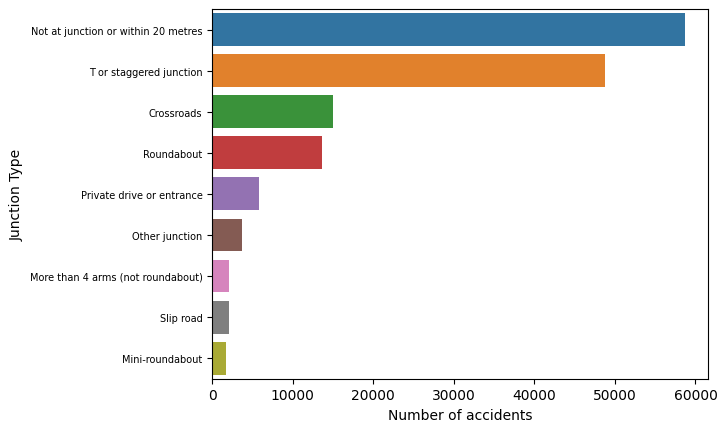

In [14]:
sns.countplot(data = df_accidents, y = df_accidents["junction_detail"], order = df_accidents["junction_detail"].value_counts().index )
plt.yticks(fontsize=7)
plt.xlabel("Number of accidents")
plt.ylabel("Junction Type")
plt.show()

Most accidents happened in locations without a junction or within 20 meters

### What is the effect of the number of vehicles damaged on the number of human casualties? 

In [15]:
df_accidents[['number_of_casualties','number_of_vehicles','accident_severity']][df_accidents[['number_of_casualties','number_of_vehicles','accident_severity']]["accident_severity"]=="Fatal"].sort_values(["number_of_casualties","number_of_vehicles"]).value_counts()

number_of_casualties  number_of_vehicles  accident_severity
1                     1                   Fatal                618
                      2                   Fatal                335
2                     2                   Fatal                194
                      1                   Fatal                130
3                     2                   Fatal                 78
1                     3                   Fatal                 78
2                     3                   Fatal                 55
4                     2                   Fatal                 51
3                     1                   Fatal                 36
                      3                   Fatal                 28
4                     3                   Fatal                 23
                      1                   Fatal                 23
5                     2                   Fatal                 15
1                     4                   Fatal                 14
2 

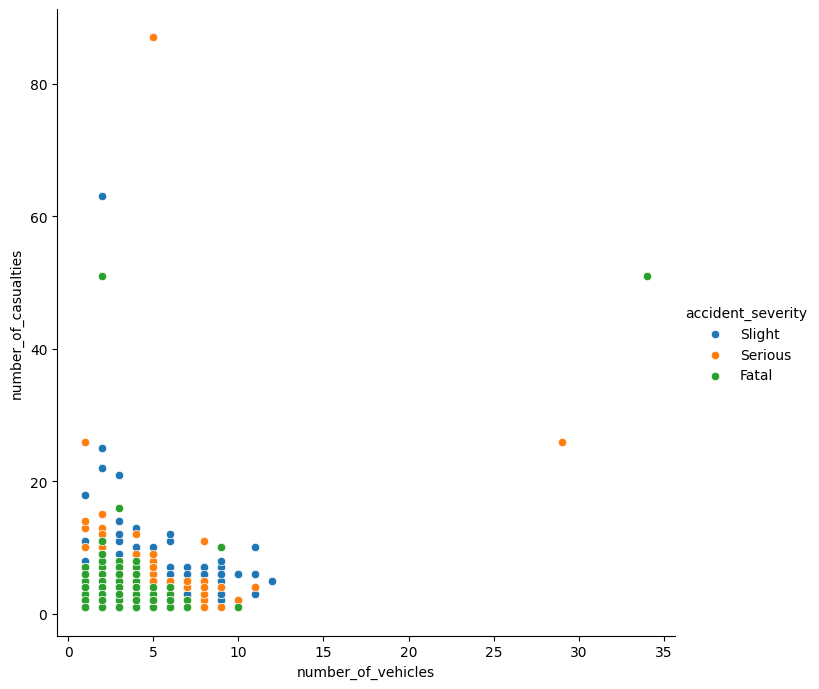

In [16]:
sns.FacetGrid(df_accidents,hue='accident_severity',height=7).map(sns.scatterplot,'number_of_vehicles','number_of_casualties').add_legend();

Most accidents caused by the number of vehicles between 0 and 10 produced between 0 and 20 causalities. Fatal accidents are more common among records with less than 4 vehicles and less than 5 casualties.

## What is the density of occurrence of accidents on the UK map?

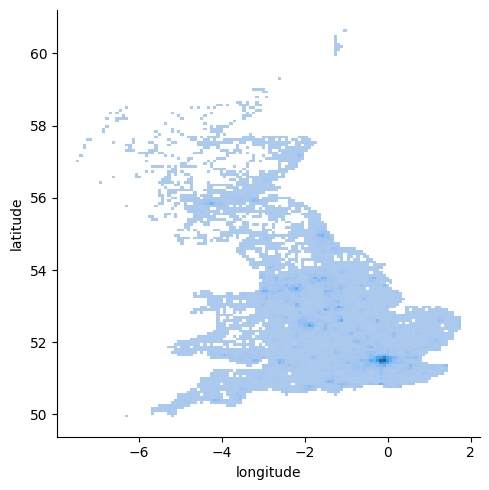

In [17]:
sns.displot(data=df_accidents, x="longitude", y="latitude");

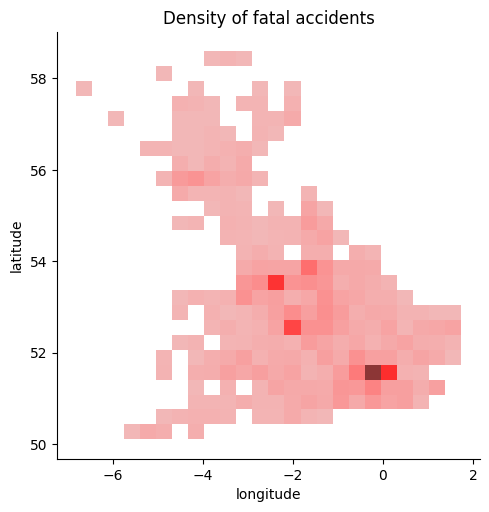

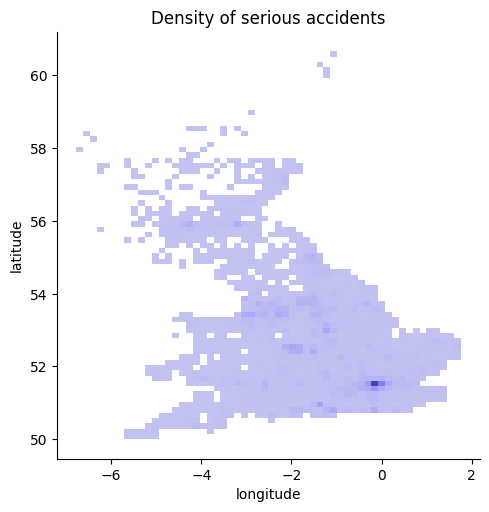

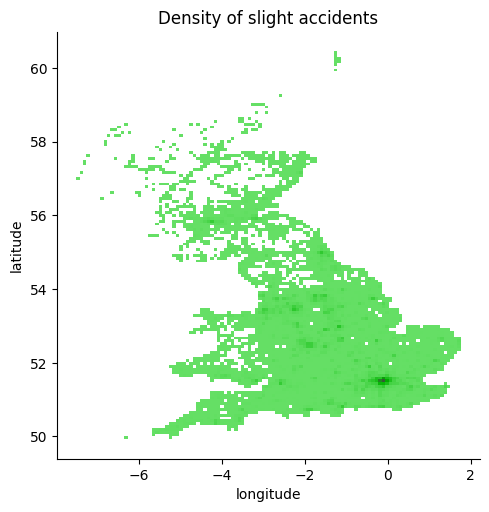

In [18]:
sns.displot(data=df_accidents[df_accidents["accident_severity"] == "Fatal"], x="longitude", y="latitude",color="r");

plt.title("Density of fatal accidents")
plt.show()

sns.displot(data=df_accidents[df_accidents["accident_severity"] == "Serious"], x="longitude", y="latitude",color="b");
plt.title("Density of serious accidents")
plt.show()

sns.displot(data=df_accidents[df_accidents["accident_severity"] == "Slight"], x="longitude", y="latitude",color="g");
plt.title("Density of slight accidents")
plt.show()




Some locations have a higher density than other locations which suggests that denser locations are major cities. Also, the severity of accidents seem to decrease in areas far from denser locations

# 3 - Cleaning Data

## Removing Reduntant Features

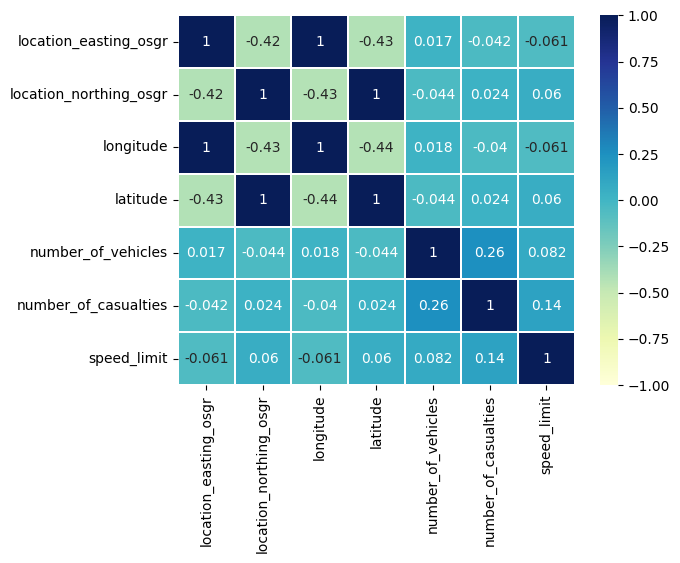

In [19]:
sns.heatmap(df_accidents.drop(["accident_year"],axis = 1).corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2);

Since more than one column signifies geographical location, only longitude and latitude are kept while location_northing_osgr and location_easting_osgr are removed

In [20]:
df_redundant_removed = df_accidents.drop(["location_easting_osgr","location_northing_osgr"],axis=1).copy()

accident_reference is similar to the index column, so it could be removed

In [21]:
df_redundant_removed = df_redundant_removed.drop(["accident_reference"],axis=1)

In [22]:
df_redundant_removed.head()

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,-0.192203,51.495766,Metropolitan Police,Slight,1,1,13/01/2011,Thursday,16:54,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812
201101BS70002,2011,-0.165408,51.495710,Metropolitan Police,Serious,2,1,11/01/2011,Tuesday,19:45,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819
201101BS70003,2011,-0.170401,51.489763,Metropolitan Police,Slight,1,1,19/01/2011,Wednesday,17:30,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914
201101BS70005,2011,-0.194856,51.497875,Metropolitan Police,Slight,2,3,25/01/2011,Tuesday,23:40,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813
201101BS70007,2011,-0.182783,51.482671,Metropolitan Police,Slight,2,1,06/01/2011,Thursday,06:20,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913


## Observing and handling Structure of data

In [23]:
df_structured = df_redundant_removed

While importing the data, a warning appeared about different type in lsoa_of_accident_location

In [24]:
df_structured.lsoa_of_accident_location.unique()

array(['E01002812', 'E01002819', 'E01002914', ..., 'W01000435',
       'W01000486', -1], dtype=object)

In [25]:
df_structured.lsoa_of_accident_location.value_counts().index

Index([       '-1',          -1, 'E01000004', 'E01004736', 'E01011365',
       'E01008440', 'E01013869', 'E01004764', 'E01005131', 'E01001771',
       ...
       'E01025081', 'E01027872', 'E01000900', 'E01019508', 'E01015327',
       'E01002106', 'W01001166', 'E01028368', 'E01023440', 'E01006407'],
      dtype='object', length=29224)

As can be seen, the lsoa_of_accident_location has int and string datatypes and it appears that the majority of records are strings, so we stringify all of its records.

In [26]:
df_structured.lsoa_of_accident_location = df_structured.lsoa_of_accident_location.astype(str)

In [27]:
df_structured.lsoa_of_accident_location.value_counts().index

Index(['-1', 'E01000004', 'E01004736', 'E01011365', 'E01008440', 'E01013869',
       'E01004764', 'E01005131', 'E01001771', 'E01016952',
       ...
       'E01025081', 'E01027872', 'E01000900', 'E01019508', 'E01015327',
       'E01002106', 'W01001166', 'E01028368', 'E01023440', 'E01006407'],
      dtype='object', length=29223)

Obeserving local_authority_district and local_authority_ons_district data

In [28]:
district_and_ons_combined = pd.DataFrame(df_structured.groupby(["local_authority_district","local_authority_ons_district","local_authority_highway"],as_index=False)["accident_year"].count())
district_and_ons_combined

,local_authority_district,local_authority_ons_district,local_authority_highway,accident_year
0,Aberdeen City,Aberdeen City,Aberdeen City,360
1,Aberdeenshire,Aberdeenshire,Aberdeenshire,518
2,Adur,Adur,West Sussex,145
3,Allerdale,Allerdale,Cumbria,223
4,Amber Valley,Amber Valley,Derbyshire,308
...,...,...,...,...
376,Wychavon,Wychavon,Worcestershire,303
377,Wycombe,Wycombe,Buckinghamshire,402
378,Wyre,Wyre,Lancashire,285
379,Wyre Forest,Wyre Forest,Worcestershire,238


Similar records contain extra '.' and ','  so all of these characters are removed

In [29]:
# df_structured["local_authority_district"] =  df_structured["local_authority_district"].str.replace(r',', '').replace(r'\.', '')
# df_structured["local_authority_highway"] =  df_structured["local_authority_highway"].str.replace(r',', '').replace(r'\.', '')
# df_structured["local_authority_ons_district"] =  df_structured["local_authority_ons_district"].str.replace(r',', '').replace(r'\.', '')

In [30]:
df_structured

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,-0.192203,51.495766,Metropolitan Police,Slight,1,1,13/01/2011,Thursday,16:54,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812
201101BS70002,2011,-0.165408,51.495710,Metropolitan Police,Serious,2,1,11/01/2011,Tuesday,19:45,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819
201101BS70003,2011,-0.170401,51.489763,Metropolitan Police,Slight,1,1,19/01/2011,Wednesday,17:30,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914
201101BS70005,2011,-0.194856,51.497875,Metropolitan Police,Slight,2,3,25/01/2011,Tuesday,23:40,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813
201101BS70007,2011,-0.182783,51.482671,Metropolitan Police,Slight,2,1,06/01/2011,Thursday,06:20,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011984145611,2011,-3.495884,55.343306,Dumfries and Galloway,Slight,1,1,17/12/2011,Saturday,05:22,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Other,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2011984145911,2011,-3.467026,55.223770,Dumfries and Galloway,Serious,1,1,19/12/2011,Monday,07:20,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2011984146011,2011,-3.514288,55.366895,Dumfries and Galloway,Slight,2,1,17/12/2011,Saturday,06:00,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1


The day and month are extracted from each record in the date column and added to the dataset as new columns

In [31]:
months=[]
days=[]
#years=[]
col =df_structured['date']
for d in col:
    date=d.split('/')
    months.append(date[1])
    #years.append(date[2])
    days.append(date[0])
df_structured['Month']=months
df_structured['Day']=days

df_structured['Month']=df_structured['Month'].astype(int)
df_structured['Day']=df_structured['Day'].astype(int)
df_structured.drop(columns='date',axis=1,inplace=True)
df_structured

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Month,Day
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,-0.192203,51.495766,Metropolitan Police,Slight,1,1,Thursday,16:54,Kensington and Chelsea,...,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812,1,13
201101BS70002,2011,-0.165408,51.495710,Metropolitan Police,Serious,2,1,Tuesday,19:45,Kensington and Chelsea,...,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819,1,11
201101BS70003,2011,-0.170401,51.489763,Metropolitan Police,Slight,1,1,Wednesday,17:30,Kensington and Chelsea,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914,1,19
201101BS70005,2011,-0.194856,51.497875,Metropolitan Police,Slight,2,3,Tuesday,23:40,Kensington and Chelsea,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813,1,25
201101BS70007,2011,-0.182783,51.482671,Metropolitan Police,Slight,2,1,Thursday,06:20,Kensington and Chelsea,...,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011984145611,2011,-3.495884,55.343306,Dumfries and Galloway,Slight,1,1,Saturday,05:22,Dumfries and Galloway,...,Other,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1,12,17
2011984145911,2011,-3.467026,55.223770,Dumfries and Galloway,Serious,1,1,Monday,07:20,Dumfries and Galloway,...,Raining no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1,12,19
2011984146011,2011,-3.514288,55.366895,Dumfries and Galloway,Slight,2,1,Saturday,06:00,Dumfries and Galloway,...,Raining no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1,12,17


The hour and minute are extracted from each record in the time column and added to the dataset as new columns

In [32]:
hours=[]
minutes=[]
col =df_structured['time']
for t in col:
    time=t.split(':')
    hours.append(time[0])
    #years.append(date[2])
    minutes.append(time[1])
df_structured['Hour']=hours
df_structured['Minute']=minutes

df_structured['Hour']=df_structured['Hour'].astype(int)
df_structured['Minute']=df_structured['Minute'].astype(int)
df_structured.drop(columns='time',axis=1,inplace=True)
df_structured

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Month,Day,Hour,Minute
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,-0.192203,51.495766,Metropolitan Police,Slight,1,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,Yes,Non-trunk,E01002812,1,13,16,54
201101BS70002,2011,-0.165408,51.495710,Metropolitan Police,Serious,2,1,Tuesday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,Yes,Non-trunk,E01002819,1,11,19,45
201101BS70003,2011,-0.170401,51.489763,Metropolitan Police,Slight,1,1,Wednesday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,Yes,Non-trunk,E01002914,1,19,17,30
201101BS70005,2011,-0.194856,51.497875,Metropolitan Police,Slight,2,3,Tuesday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,Yes,Non-trunk,E01002813,1,25,23,40
201101BS70007,2011,-0.182783,51.482671,Metropolitan Police,Slight,2,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,No,Non-trunk,E01002913,1,6,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011984145611,2011,-3.495884,55.343306,Dumfries and Galloway,Slight,1,1,Saturday,Dumfries and Galloway,Dumfries and Galloway,...,None,None,Rural,Yes,Data missing or out of range,-1,12,17,5,22
2011984145911,2011,-3.467026,55.223770,Dumfries and Galloway,Serious,1,1,Monday,Dumfries and Galloway,Dumfries and Galloway,...,None,None,Rural,Yes,Data missing or out of range,-1,12,19,7,20
2011984146011,2011,-3.514288,55.366895,Dumfries and Galloway,Slight,2,1,Saturday,Dumfries and Galloway,Dumfries and Galloway,...,None,None,Rural,Yes,Data missing or out of range,-1,12,17,6,0


## Observing Missing and duplicate Data

### Missing Values

#### Observing Missing Values

In [33]:
df_accidents_missing_nan = df_structured.copy()
df_accidents_missing_nan

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Month,Day,Hour,Minute
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,-0.192203,51.495766,Metropolitan Police,Slight,1,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,Yes,Non-trunk,E01002812,1,13,16,54
201101BS70002,2011,-0.165408,51.495710,Metropolitan Police,Serious,2,1,Tuesday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,Yes,Non-trunk,E01002819,1,11,19,45
201101BS70003,2011,-0.170401,51.489763,Metropolitan Police,Slight,1,1,Wednesday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,Yes,Non-trunk,E01002914,1,19,17,30
201101BS70005,2011,-0.194856,51.497875,Metropolitan Police,Slight,2,3,Tuesday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,Yes,Non-trunk,E01002813,1,25,23,40
201101BS70007,2011,-0.182783,51.482671,Metropolitan Police,Slight,2,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,...,None,None,Urban,No,Non-trunk,E01002913,1,6,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011984145611,2011,-3.495884,55.343306,Dumfries and Galloway,Slight,1,1,Saturday,Dumfries and Galloway,Dumfries and Galloway,...,None,None,Rural,Yes,Data missing or out of range,-1,12,17,5,22
2011984145911,2011,-3.467026,55.223770,Dumfries and Galloway,Serious,1,1,Monday,Dumfries and Galloway,Dumfries and Galloway,...,None,None,Rural,Yes,Data missing or out of range,-1,12,19,7,20
2011984146011,2011,-3.514288,55.366895,Dumfries and Galloway,Slight,2,1,Saturday,Dumfries and Galloway,Dumfries and Galloway,...,None,None,Rural,Yes,Data missing or out of range,-1,12,17,6,0


A function to calculate the missing values percentage per column

In [34]:
def percent_missing(df):
    percent_nan = 100 * df.isna().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=False)
    return percent_nan

In [35]:
print("Sum Of Null values")
print(df_accidents_missing_nan.isna().sum())
print("\nPercentage Of Null values")
percent_nan = percent_missing(df_accidents_missing_nan)
print(percent_nan)
print("Columns with Missing Values (nans or nulls): ", list(df_accidents_missing_nan.isnull().sum()[df_accidents_missing_nan.isnull().sum() > 0].index))

Sum Of Null values
accident_year                                      0
longitude                                          0
latitude                                           0
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
day_of_week                                        0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  0
road_type                                        729
speed_limit                                        0
junction_detail                                    0
junction_control                                   0
second_road_class                                  0
second_road_number         


Observing local_authority_highway values

In [36]:
df_accidents_missing_nan["local_authority_highway"].unique()

array(['Kensington and Chelsea', 'Westminster', 'Hammersmith and Fulham',
       'City of London', 'Hackney', 'Camden', 'Tower Hamlets',
       'Islington', 'Brent', 'Haringey', 'Hillingdon', 'Enfield',
       'Ealing', 'Waltham Forest', 'London Airport (Heathrow)',
       'Hounslow', 'Redbridge', 'Newham', 'Barking and Dagenham',
       'Havering', 'Lambeth', 'Southwark', 'Merton', 'Croydon',
       'Wandsworth', 'Lewisham', 'Greenwich', 'Bromley', 'Bexley',
       'Harrow', 'Barnet', 'Richmond upon Thames', 'Kingston upon Thames',
       'Sutton', 'Cumbria', 'Lancashire', 'Blackpool',
       'Blackburn with Darwen', 'Wirral', 'Sefton', 'Liverpool',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', 'Trafford', 'Bury', 'Rochdale',
       'Oldham', 'Cheshire West and Chester', 'Warrington', 'Halton',
       'Cheshire East', 'Northumberland', 'North Tyneside', 'Gateshead',
       'Sunderland', 'South Tyneside', 'Newcastle upon Ty

Observing records with local_authority_highway = -1

In [37]:
df_accidents_missing_local_authority_highway = df_accidents_missing_nan[df_accidents_missing_nan["local_authority_highway"]=="-1"].loc[:,["local_authority_district","local_authority_ons_district","local_authority_highway","trunk_road_flag"]]
df_accidents_missing_local_authority_highway

,local_authority_district,local_authority_ons_district,local_authority_highway,trunk_road_flag
accident_index,,,,
2011370000211,Waveney,Waveney,-1,Trunk (Roads managed by Highways England)
2011370000311,Waveney,Waveney,-1,Non-trunk
2011370001011,St. Edmundsbury,St Edmundsbury,-1,Non-trunk
2011370001111,Suffolk Coastal,Suffolk Coastal,-1,Non-trunk
2011370001211,Waveney,Waveney,-1,Non-trunk
...,...,...,...,...
2011370540811,Suffolk Coastal,Suffolk Coastal,-1,Non-trunk
2011370541411,St. Edmundsbury,St Edmundsbury,-1,Non-trunk
2011370542911,Suffolk Coastal,Suffolk Coastal,-1,Non-trunk


Same local_authority_district and local_authority_ons_district. 
Considered as <b>MAR</b> as it depends on other columns

Checking if these districts have other highway values

In [38]:
no_highway_districts = df_accidents_missing_local_authority_highway.local_authority_district.unique()
no_highway_districts

array(['Waveney', 'St. Edmundsbury', 'Suffolk Coastal', 'Forest Heath'],
      dtype=object)

In [39]:
df_accidents[df_accidents_missing_nan["local_authority_district"].isin(no_highway_districts)].local_authority_highway.unique()

array(['-1'], dtype=object)

All cities with missing highway do not have other values for highway

Observing first_road_number values

In [40]:
df_accidents_missing_nan['first_road_number'].unique()

array(['first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',
       '304', '3220', ..., '729', '7076', '7068'], dtype=object)

The first_road_class is C or Unclassified value does not have an official number so it is replaced by a zero.

In [41]:
df_accidents_missing_nan[df_accidents_missing_nan['first_road_number'] == 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero '][["first_road_number","first_road_class","second_road_class","second_road_number"]]

,first_road_number,first_road_class,second_road_class,second_road_number
accident_index,,,,
201101BS70001,first_road_class is C or Unclassified. These r...,C,Unclassified,first_road_class is C or Unclassified. These r...
201101BS70002,first_road_class is C or Unclassified. These r...,C,Unclassified,first_road_class is C or Unclassified. These r...
201101BS70005,first_road_class is C or Unclassified. These r...,Unclassified,Unclassified,first_road_class is C or Unclassified. These r...
201101BS70008,first_road_class is C or Unclassified. These r...,Unclassified,Unclassified,first_road_class is C or Unclassified. These r...
201101BS70009,first_road_class is C or Unclassified. These r...,C,Unclassified,first_road_class is C or Unclassified. These r...
...,...,...,...,...
2011984136011,first_road_class is C or Unclassified. These r...,C,-1,NaN
2011984136811,first_road_class is C or Unclassified. These r...,C,-1,NaN
2011984139311,first_road_class is C or Unclassified. These r...,Unclassified,Unclassified,first_road_class is C or Unclassified. These r...


In [42]:
df_accidents_missing_nan['second_road_class'].unique()

array(['Unclassified', '-1', 'A', 'C', 'B', 'Motorway', 'A(M)'],
      dtype=object)

The data values that need to be considered are Unclassified and -1. The -1 values correspond to accidents having no second road class, which is defined by the type of junction, which is MNAR. For the Unclassified values, roads are not given a type. To prove this statement, we do the following analysis.

Check if second road class with -1 relates to second road number with values None. 

In [43]:
print(df_accidents_missing_nan[df_accidents_missing_nan['second_road_class'] == '-1'][["second_road_class","second_road_number"]].drop_duplicates())

               second_road_class second_road_number
accident_index                                     
201101BS70003                 -1                NaN


We conclude that the second road number is None if and only if second road class value is -1 or missing.

Investigating relation between Unclassified second_road_number and second_road_class

In [44]:
df_accidents_missing_nan[df_accidents_missing_nan['second_road_class'] == 'Unclassified'][["second_road_class","second_road_number"]].drop_duplicates()

,second_road_class,second_road_number
accident_index,,
201101BS70001,Unclassified,first_road_class is C or Unclassified. These r...


Observing light_conditions values

In [45]:
df_accidents_missing_nan['light_conditions'].unique()

array(['Darkness - lights lit', 'Daylight', 'Darkness - no lighting',
       'Darkness - lighting unknown', 'Darkness - lights unlit'],
      dtype=object)

In [46]:
pd.DataFrame(df_accidents[df_accidents['light_conditions']=="Darkness - lighting unknown"]['time'].sort_values())

,time
accident_index,
2011350784611,00:01
201134NW30281,00:01
201143R164041,00:01
201145EL57927,00:01
2011130078514,00:01
...,...
2011030001800,23:55
2011460198170,23:55
2011130410493,23:55


Darkness - lighting unknown considered as missing, it can be observed that most occurrences of this data happens during the night with other occurrences in the day happening less often. This could infer that this missing data is <b>MAR</b>.
<!-- specific feature seems to be correlated with lighting so we can safely assume it is <b>MAR</b>  -->

Observing special_conditions_at_site values

In [47]:
df_accidents_missing_nan['special_conditions_at_site'].unique()

array(['None', 'Roadworks', 'Auto traffic signal - out',
       'Auto signal part defective', 'Oil or diesel',
       'Road surface defective', 'Mud',
       'Road sign or marking defective or obscured'], dtype=object)

Observing trunk_road_flag values

In [48]:
df_accidents_missing_nan['trunk_road_flag'].unique()

array(['Non-trunk', 'Trunk (Roads managed by Highways England)',
       'Data missing or out of range'], dtype=object)

In [49]:
df_accidents_missing_nan[df_accidents_missing_nan["trunk_road_flag"] == "Trunk (Roads managed by Highways England)"]["first_road_class"].unique()

array(['Motorway', 'A', 'A(M)'], dtype=object)

In [50]:
df_accidents_missing_nan[df_accidents_missing_nan["first_road_class"].isin(['Motorway'])]["trunk_road_flag"].unique()

array(['Trunk (Roads managed by Highways England)', 'Non-trunk',
       'Data missing or out of range'], dtype=object)

## Handling Missing data

Here the values that are equivalent to Nan such as -1 and Data missing or out of range are replaced with Nan. After that, we returned the longitude and latitude columns to the dataset

In [51]:
equivalent_to_nan = ["-1",-1]
features_to_not_replace_nan = ["longitude","latitude"]
df_accidents_missing_nan = df_accidents_missing_nan.drop(features_to_not_replace_nan,axis=1).replace(equivalent_to_nan,np.nan)
df_accidents_missing_nan[features_to_not_replace_nan] = df_accidents[features_to_not_replace_nan]

In [52]:
def contain_missing_value(x,feature_name):
    no_feature = "no "+ feature_name.split("_")[0].split(" ")[0]
    missing_values = ["missing","unknown","none",no_feature]
    for st in missing_values:
        if st in str(x).lower():
            return True
    return False

In [53]:
for feature in df_accidents_missing_nan.columns:
    df_accidents_missing_nan[feature] = df_accidents_missing_nan[feature].apply(lambda x: np.nan if contain_missing_value(x,feature) else x)

In [54]:
df_accidents_missing_nan = df_accidents_missing_nan.applymap(lambda x: np.nan if "missing" in str(x).lower() or "unknown" in str(x).lower() else x)

A visualization of missing value percentage per column.

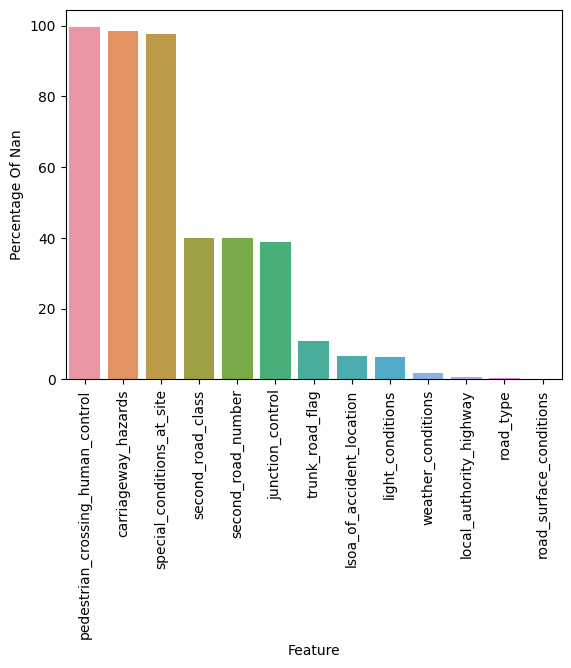

In [55]:
percent_nan = percent_missing(df_accidents_missing_nan)
sns.barplot(x=percent_nan.index,y=percent_nan);
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Percentage Of Nan");

Here every column with missing values percentage higher than 85 is dropped, as it can't be imputed

In [56]:
percent_nan = percent_missing(df_accidents_missing_nan)
drop_columns=percent_nan[percent_nan>85].index
df_accidents_drop=df_accidents_missing_nan.drop(columns=drop_columns)

The missing values of the road type are imputed by getting the mode of road type with respect to the district

In [57]:
df_accidents_drop_fill=df_accidents_drop.copy()
idxs=df_accidents_drop_fill[df_accidents_drop_fill['road_type'].isna()].index.tolist()

df_accidents_drop_fill['road_type']=df_accidents_drop.groupby('local_authority_district')['road_type'].apply(lambda val: val.fillna(val.mode().iloc[0]))
print(df_accidents_drop_fill['road_type'].unique())
imputed=df_accidents_drop_fill['road_type'].loc[idxs]
imputedunique=imputed.unique()
print(imputedunique)

['Single carriageway' 'Roundabout' 'One way street' 'Dual carriageway'
 'Slip road']
['Single carriageway' 'Dual carriageway']


Here the missing values of the weather conditions column are imputed by getting the mode of weather conditions with respect to the month and local authority district

In [58]:
idxs=df_accidents_drop_fill[df_accidents_drop_fill['weather_conditions'].isna()].index.tolist()

df_accidents_drop_fill['weather_conditions']=df_accidents_drop_fill.groupby(['Month','local_authority_district'])['weather_conditions'].apply(lambda val: val.fillna(val.mode().iloc[0]))
print(df_accidents_drop_fill['weather_conditions'].isna().sum())
print(df_accidents_drop_fill['weather_conditions'].unique())
imputed=df_accidents_drop_fill['weather_conditions'].loc[idxs]
imputedunique=imputed.unique()
print(imputedunique)

0
['Raining no high winds' 'Fine no high winds' 'Other' 'Fine + high winds'
 'Raining + high winds' 'Snowing no high winds' 'Fog or mist'
 'Snowing + high winds']
['Fine no high winds' 'Raining no high winds']


Here the record "first road class is c or unclassified......recorded as zero" which can found in the first road type column is replaced with zero every time it appears

In [59]:
df_accidents_drop_complete = df_accidents_drop_fill.copy()

In [60]:
df_accidents_drop_complete.replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ','0',inplace=True)


In [61]:
print(df_accidents_drop_complete['first_road_number'].unique())
vals=df_accidents_drop_complete['second_road_number'].unique()
print(df_accidents_drop_complete['second_road_number'].unique())

['0' '304' '3220' ... '729' '7076' '7068']
['0' nan '4.0' ... '7076.0' '6318.0' '708.0']


In [62]:
df_accidents_drop_complete['road_surface_conditions'].unique()

array(['Wet or damp', 'Dry', 'Frost or ice', 'Snow',
       'Flood over 3cm. deep', nan], dtype=object)

The missing values in the road surface conditions are imputed by the mode with respect to weather conditions

In [63]:
idxs=df_accidents_drop_complete[df_accidents_drop_complete['road_surface_conditions'].isna()].index.tolist()

df_accidents_drop_complete['road_surface_conditions']=df_accidents_drop_complete.groupby(['weather_conditions'])['road_surface_conditions'].apply(lambda val: val.fillna(val.mode().iloc[0]))
imputed=df_accidents_drop_complete['road_surface_conditions'].loc[idxs]
imputedunique=imputed.unique()
print(df_accidents_drop_complete['road_surface_conditions'].unique())
print(imputedunique)


['Wet or damp' 'Dry' 'Frost or ice' 'Snow' 'Flood over 3cm. deep']
['Dry' 'Wet or damp']


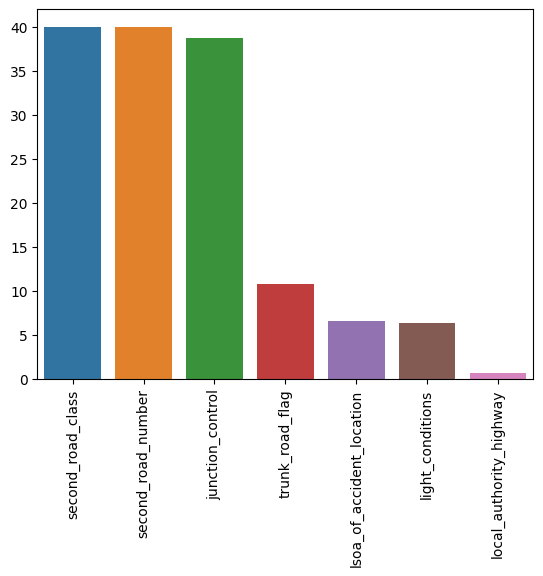

In [64]:
percent_nan = percent_missing(df_accidents_drop_complete)
sns.barplot(x=percent_nan.index,y=percent_nan);
plt.xticks(rotation=90);

The missing values in the light conditions column are imputed by getting the mode of light conditions per hour

In [65]:
idxs=df_accidents_drop_complete[df_accidents_drop_complete['light_conditions'].isna()].index.tolist()

df_accidents_drop_complete['light_conditions']=df_accidents_drop_complete.groupby(['Hour'])['light_conditions'].apply(lambda val: val.fillna(val.mode().iloc[0]))

imputed=df_accidents_drop_complete['light_conditions'].loc[idxs]
imputedunique=imputed.unique()

print(df_accidents_drop_complete['light_conditions'].unique())
print(imputedunique)

['Darkness - lights lit' 'Daylight' 'Darkness - lights unlit']
['Darkness - lights lit' 'Daylight']


Handling trunk_road_flag_outliers


In [66]:
df_accidents_drop_complete

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Month,Day,Hour,Minute,longitude,latitude
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,Metropolitan Police,Slight,1,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,...,Urban,Yes,Non-trunk,E01002812,1,13,16,54,-0.192203,51.495766
201101BS70002,2011,Metropolitan Police,Serious,2,1,Tuesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,...,Urban,Yes,Non-trunk,E01002819,1,11,19,45,-0.165408,51.495710
201101BS70003,2011,Metropolitan Police,Slight,1,1,Wednesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,...,Urban,Yes,Non-trunk,E01002914,1,19,17,30,-0.170401,51.489763
201101BS70005,2011,Metropolitan Police,Slight,2,3,Tuesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,...,Urban,Yes,Non-trunk,E01002813,1,25,23,40,-0.194856,51.497875
201101BS70007,2011,Metropolitan Police,Slight,2,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,...,Urban,No,Non-trunk,E01002913,1,6,6,20,-0.182783,51.482671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011984145611,2011,Dumfries and Galloway,Slight,1,1,Saturday,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A(M),...,Rural,Yes,NaN,NaN,12,17,5,22,-3.495884,55.343306
2011984145911,2011,Dumfries and Galloway,Serious,1,1,Monday,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A,...,Rural,Yes,NaN,NaN,12,19,7,20,-3.467026,55.223770
2011984146011,2011,Dumfries and Galloway,Slight,2,1,Saturday,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A(M),...,Rural,Yes,NaN,NaN,12,17,6,0,-3.514288,55.366895


Here we impute the missing values in the trunk road flag column by the mode per first road class

In [67]:
idxs=df_accidents_drop_complete[df_accidents_drop_complete['trunk_road_flag'].isna()].index.tolist()

df_accidents_drop_complete['trunk_road_flag']=df_accidents_drop_complete.groupby(['first_road_class'])['trunk_road_flag'].apply(lambda val: val.fillna(val.mode().iloc[0]))
print(df_accidents_drop_complete['trunk_road_flag'].unique())

['Non-trunk' 'Trunk (Roads managed by Highways England)']


In [68]:
df_accidents_drop_complete['trunk_road_flag'].isna().sum()

0

In [69]:
imputed=df_accidents_drop_complete['trunk_road_flag'].loc[idxs]
uniqueimputed=imputed.unique()
print(uniqueimputed)

['Non-trunk' 'Trunk (Roads managed by Highways England)']


The local authority highway missing values are replaced with corresponding local_authority_district in the same row

In [70]:
df_accidents_drop_complete["local_authority_highway"].fillna(df_accidents_drop_complete["local_authority_district"],inplace = True)

In [71]:
df_accidents_drop_complete["local_authority_highway"].isna().sum()

0

We get the columns with percentage of missing values less than 1 percent to drop the rows with missing values only, since it won't affect the dataset

In [72]:
percent_nan=percent_missing(df_accidents_drop_complete)

In [73]:
drop_rows=percent_nan[percent_nan<1].index
print(list(drop_rows))
df_accidents_drop_complete=df_accidents_drop_complete.dropna(subset=drop_rows,axis=0)

[]


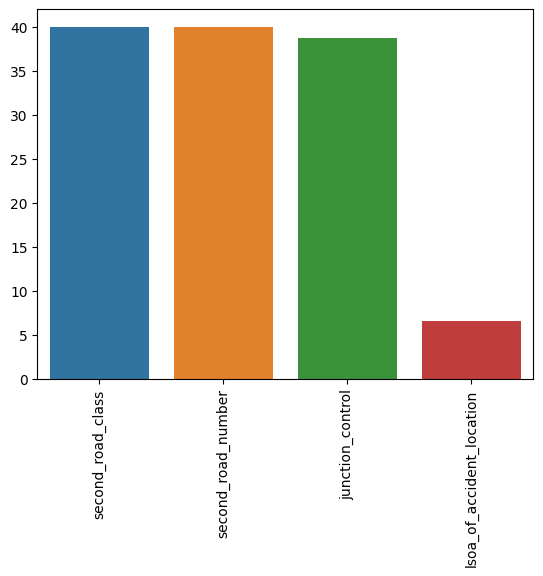

In [74]:
percent_nan = percent_missing(df_accidents_drop_complete)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Here we loop on the remaining columns with missing values, the missing values for these columns will be replaced with arbitrary values, since they aren't correlated with other columns and are hard to impute.

In [75]:
for col in percent_nan.index:
    if df_accidents_drop_complete[col].dtype=='int'or df_accidents_drop_complete[col].dtype=='float':
     df_accidents_drop_complete[col].fillna(-1,inplace=True)
    else:
        values=df_accidents_drop_complete[col].unique()
        element=values[0]
        firstchar=element[0]
        if firstchar>='0' and firstchar<='9':
            df_accidents_drop_complete[col].fillna('-1',inplace=True)
        else:
             df_accidents_drop_complete[col].fillna('None',inplace=True) 

As seen below, all missing values have been handled

In [76]:
df_accidents_drop_complete.isna().sum()

accident_year                                  0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditi

### Duplicates

#### Obeserving Duplicates

In [77]:
df_accidents_duplicates = df_accidents_drop_complete.copy()

Observing rows considered as duplicates

In [78]:
df_accidents_duplicates[df_accidents_duplicates.duplicated()]

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Month,Day,Hour,Minute,longitude,latitude
accident_index,,,,,,,,,,,,,,,,,,,,,
2011100037711,2011,Northumbria,Slight,1,1,Tuesday,Sunderland,Sunderland,Sunderland,A(M),...,Rural,Yes,Trunk (Roads managed by Highways England),E01008873,1,18,8,25,-1.544135,54.915778
2011440026279,2011,Hampshire,Slight,1,1,Wednesday,East Hampshire,East Hampshire,Hampshire,B,...,Rural,Yes,Non-trunk,E01022630,1,19,8,0,-0.947009,51.116686
2011921101438,2011,Grampian,Serious,1,1,Sunday,Aberdeenshire,Aberdeenshire,Aberdeenshire,A,...,Rural,Yes,Non-trunk,None,4,17,12,28,-3.409122,56.913151
2011930000240,2011,Tayside,Slight,1,1,Friday,Perth and Kinross,Perth and Kinross,Perth and Kinross,A,...,Rural,Yes,Non-trunk,None,1,7,10,40,-3.642056,56.403354
201197KCD3201,2011,Strathclyde,Slight,2,1,Friday,Inverclyde,Inverclyde,Inverclyde,Unclassified,...,Urban,No,Non-trunk,None,9,16,17,20,-4.820336,55.939540


#### Drop Duplicate Data

In [79]:
df_accidents_duplicates.drop_duplicates(inplace = True)
print("Number of duplicates removed =", len(df_accidents_drop_complete)-len(df_accidents_duplicates))

Number of duplicates removed = 5


# Retransforming numerical columns after imputation

Here any column with type object but all of it's values contains floats or ints will have it's type changed accordingly

In [80]:
for col in df_accidents_duplicates:
    if df_accidents_duplicates[col].dtype=='object':
     condition= pd.to_numeric(df_accidents_duplicates[col], errors='coerce').notnull().all()
     if condition:
        flag=True
        for n in df_accidents_duplicates[col]:
            condition1=n.isdigit()
            if condition1==False:
                flag=False
                break
        if flag==True:
                  df_accidents_duplicates[col]=df_accidents_duplicates[col].astype(int)

        else:
                  df_accidents_duplicates[col]=df_accidents_duplicates[col].astype(float)

## Findings and conclusions

1- Only three columns had clear Nan values which are road type, weather conditions and second road number.

2- Other columns have missing data but in other forms such as -1, data out of range, unknown,...etc.

3- For column dependency on other columns, we tried to use chi-merge but it takes more than 5 minutes and it didn't terminate, so dependencies between categorical columns couldn't be found scientifically.

4- Since most of the missing data lies in categorical columns, some of those columns missing values were imputed using multivariate imputation logically, for example the weather conditions will be much alike in the same district and the same month.

5-Some other columns can't be imputed logically according to another values, so the missing values were replace by arbitrary values according to the column type.

6-The local authority highway missing values were replaced with the value of the local authority district value in the same row, as it can be easily observed that the two columns have identical values for non-missing records for local authority highway.

7- Columns having missing values with more than 85% were dropped entirely as it's impossible to replace or impute the missing values. (3 columns in 2011 dataset)

## Observing outliers

In [81]:
df_accidents_outliers = df_accidents_duplicates.copy()

In [82]:
def detect_outlier_using_IQR(feature):
    """
    For a given feature using internal quartile range method, records considered as an outlier is returned

    Parameters
    __________
    feature: feature column (pd.Series)

    Returns
    _______
    outliers: dataframe containing records considered as oultiers (pd.DataFrame)
    """
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower = Q1 - cut_off
    upper =  Q3 + cut_off
    outliers = feature[(feature<lower) | (feature>upper)]
    return outliers

In [83]:
def detect_outlier_using_Zscore(feature):
    """
    For a given feature using Z-Score method, records considered as an outlier is returned

    Parameters
    __________
    feature: feature column (pd.Series)

    Returns
    _______
    outliers: dataframe containing records considered as oultiers (pd.DataFrame)
    """
    z = np.abs(stats.zscore(feature))
    outlier_entries = z > 3
    outliers = feature[outlier_entries]

    return outliers

In [84]:
def outlier_report(feature,method='z'):
    """
    Prints number of outliers, outliers values ,count of each value & percentage of the outliers

    Parameters
    __________
    feature: feature column (pd.Series)
    method: method to detect outliers either z or iqr (str) (default = z)
    
    Returns
    _______
    None
    """
    if method == 'z':
        outliers = detect_outlier_using_Zscore(feature)
        print("Method: Z-score")
    elif method == 'iqr':
        outliers = detect_outlier_using_IQR(feature)
        print("Method: IQR")
    count_of_outliers = len(outliers) 
    column_size = len(feature)
    
    percentage_of_outliers = count_of_outliers/column_size *100
    ouliers_distinct_values = outliers.unique()

    value_counts_df = pd.DataFrame(outliers.value_counts())
    value_counts_df.columns = ["count"]
    
    value_counts_df["percentage"] = value_counts_df["count"].apply(lambda x: int(x/column_size*100 *100000)/100000)

    print("Count Of Outliers: ",count_of_outliers,"from",column_size) 
    print("Outliers Unique Values",np.sort(ouliers_distinct_values))
    print("Percentage Of Outliers: ",int(percentage_of_outliers*1000)/1000,"%")

    return value_counts_df


In [85]:
def box_plot(feature):
    """
    Plots Box plot for a given feature

    Parameters
    __________
    feature: feature column (pd.Series)
    
    Returns
    _______
    None
    """
    sns.boxplot(data = feature, orient = 'h')

In [86]:
def dist_plot(feature):
    """
    Plots distribution and bar plot for a given feature

    Parameters
    __________
    feature: feature column (pd.Series)
    
    Returns
    _______
    None
    """
    sns.displot(data=feature, kde=True)

In [87]:
df_accidents_outliers.describe()

,accident_year,number_of_vehicles,number_of_casualties,first_road_number,speed_limit,second_road_number,Month,Day,Hour,Minute,longitude,latitude
count,151469.0,151469.000000,151469.000000,151469.000000,151469.000000,151469.000000,151469.000000,151469.000000,151469.000000,151469.000000,151469.000000,151469.000000
mean,2011.0,1.823139,1.346447,845.118876,38.535542,241.627118,6.635708,15.499502,13.543048,26.936297,-1.395404,52.555456
std,0.0,0.710168,0.856739,1656.202337,13.865242,987.152485,3.421177,8.747498,5.090112,17.524464,1.400786,1.450689
min,2011.0,1.000000,1.000000,0.000000,20.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,-7.507468,49.920895
25%,2011.0,1.000000,1.000000,0.000000,30.000000,-1.000000,4.000000,8.000000,10.000000,12.000000,-2.302925,51.482891
50%,2011.0,2.000000,1.000000,41.000000,30.000000,0.000000,7.000000,15.000000,14.000000,29.000000,-1.329990,52.205207
75%,2011.0,2.000000,1.000000,607.000000,50.000000,0.000000,10.000000,23.000000,17.000000,42.000000,-0.199094,53.450273
max,2011.0,34.000000,87.000000,9176.000000,70.000000,9174.000000,12.000000,31.000000,23.000000,59.000000,1.759382,60.662043


Observing outliers in number_of_vehicles feature

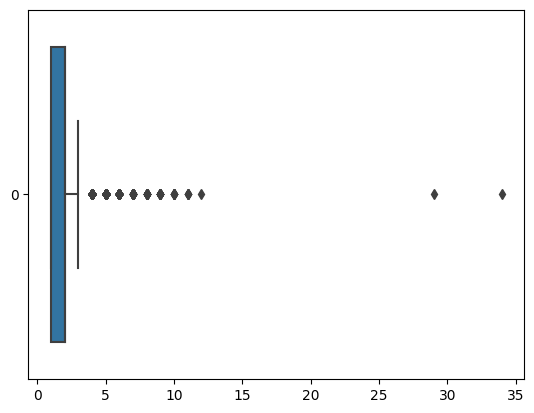

In [88]:
box_plot(df_accidents_outliers.number_of_vehicles)

In [89]:
print("Feature: number_of_vehicles")
vehicles_report = outlier_report(df_accidents_outliers.number_of_vehicles)
vehicles_report

Feature: number_of_vehicles
Method: Z-score
Count Of Outliers:  3298 from 151469
Outliers Unique Values [ 4  5  6  7  8  9 10 11 12 29 34]
Percentage Of Outliers:  2.177 %


,count,percentage
4,2477,1.63531
5,543,0.35848
6,169,0.11157
7,51,0.03367
8,25,0.01650
9,18,0.01188
10,7,0.00462
11,5,0.00330
12,1,0.00066
34,1,0.00066


In [90]:
print("Feature: number_of_vehicles")
outlier_report(df_accidents_outliers.number_of_vehicles,method='iqr')

Feature: number_of_vehicles
Method: IQR
Count Of Outliers:  3298 from 151469
Outliers Unique Values [ 4  5  6  7  8  9 10 11 12 29 34]
Percentage Of Outliers:  2.177 %


,count,percentage
4,2477,1.63531
5,543,0.35848
6,169,0.11157
7,51,0.03367
8,25,0.01650
9,18,0.01188
10,7,0.00462
11,5,0.00330
12,1,0.00066
34,1,0.00066


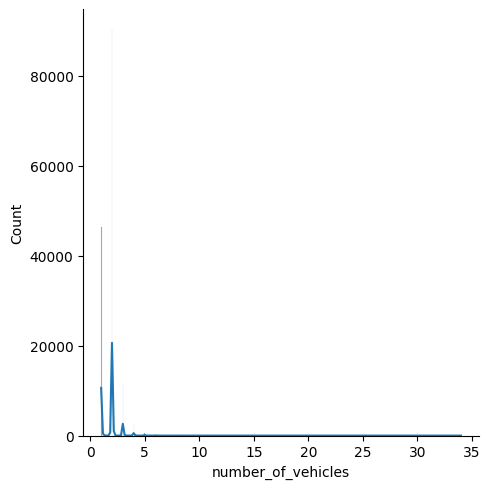

In [91]:
dist_plot(df_accidents_outliers.number_of_vehicles)

Observing outliers in number_of_casualities feature

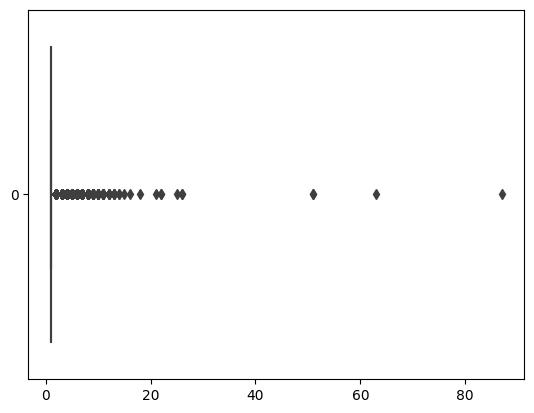

In [92]:
box_plot(df_accidents_outliers.number_of_casualties)

In [93]:
print("Feature: number_of_casualties")
outlier_report(df_accidents_outliers.number_of_casualties)

Feature: number_of_casualties
Method: Z-score
Count Of Outliers:  4022 from 151469
Outliers Unique Values [ 4  5  6  7  8  9 10 11 12 13 14 15 16 18 21 22 25 26 51 63 87]
Percentage Of Outliers:  2.655 %


,count,percentage
4,2528,1.66898
5,900,0.59418
6,350,0.23107
7,123,0.08120
8,49,0.03234
9,23,0.01518
11,14,0.00924
10,11,0.00726
12,5,0.00330
13,4,0.00264


In [94]:
print("Feature: number_of_casualties")
casualties_report = outlier_report(df_accidents_outliers.number_of_casualties,method='iqr')
casualties_report

Feature: number_of_casualties
Method: IQR
Count Of Outliers:  34597 from 151469
Outliers Unique Values [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 21 22 25 26 51 63 87]
Percentage Of Outliers:  22.84 %


,count,percentage
2,23671,15.62762
3,6904,4.55802
4,2528,1.66898
5,900,0.59418
6,350,0.23107
7,123,0.08120
8,49,0.03234
9,23,0.01518
11,14,0.00924
10,11,0.00726


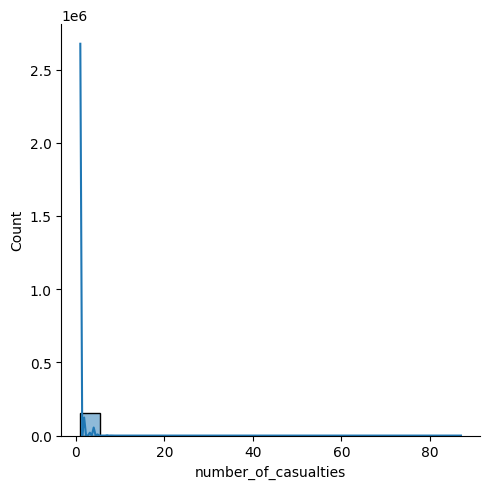

In [95]:
dist_plot(df_accidents_outliers.number_of_casualties)

Checking multivirate outliers between number_of_vehicles and number_of_casualties

In [96]:
clf = LocalOutlierFactor()
X = df_accidents_outliers[['number_of_vehicles','number_of_casualties']].values
y_pred = clf.fit_predict(X)

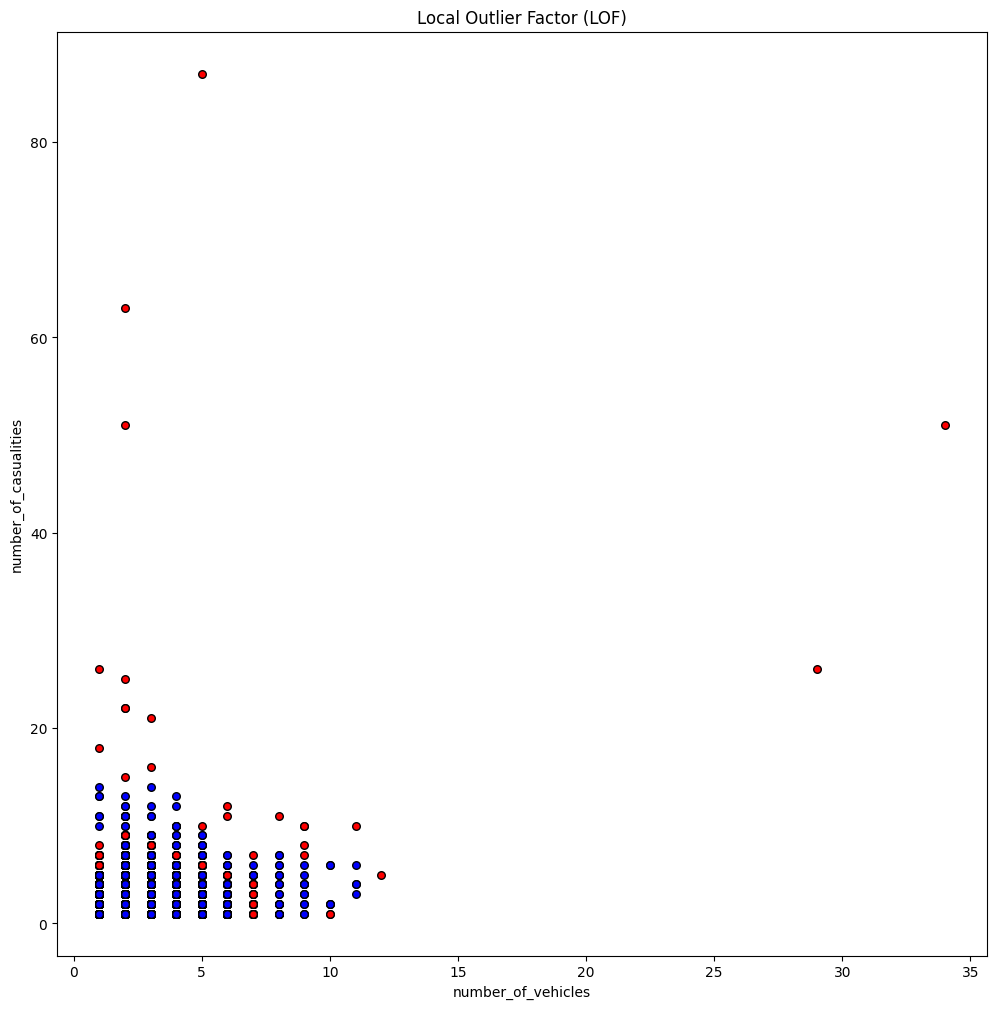

In [97]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')

plt.ylabel('number_of_casualities');
plt.xlabel('number_of_vehicles');
plt.show()

Observing outliers in longitude feature

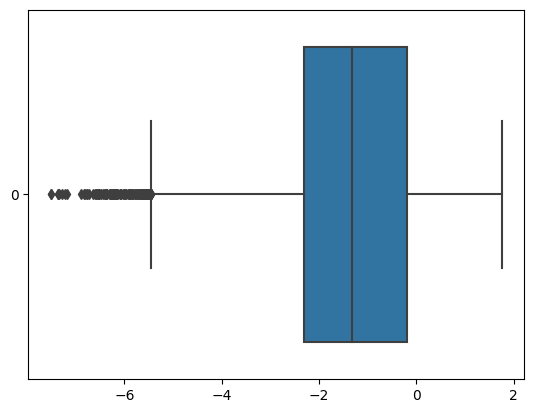

In [98]:
box_plot(df_accidents_outliers.longitude)

In [99]:
print("Feature: longitude")
outlier_report(df_accidents_outliers.longitude)

Feature: longitude
Method: Z-score
Count Of Outliers:  104 from 151469
Outliers Unique Values [-7.507468 -7.507207 -7.373289 -7.370747 -7.338419 -7.286333 -7.21116
 -7.1774   -6.893708 -6.830392 -6.815342 -6.774299 -6.766665 -6.723849
 -6.649026 -6.610889 -6.575845 -6.557251 -6.53389  -6.529595 -6.528417
 -6.514064 -6.473411 -6.429833 -6.402845 -6.396319 -6.389928 -6.388969
 -6.3866   -6.382801 -6.377513 -6.351889 -6.30214  -6.294247 -6.289408
 -6.286691 -6.281754 -6.2595   -6.25163  -6.241766 -6.23184  -6.223172
 -6.210618 -6.205291 -6.205218 -6.202804 -6.20135  -6.200674 -6.198702
 -6.193117 -6.185721 -6.18244  -6.17544  -6.1598   -6.156977 -6.155358
 -6.151446 -6.09503  -6.094092 -6.068355 -6.018095 -6.00198  -5.993115
 -5.961843 -5.934702 -5.908617 -5.884077 -5.881248 -5.866854 -5.835027
 -5.828797 -5.820843 -5.784169 -5.780686 -5.755878 -5.749785 -5.712554
 -5.712373 -5.683047 -5.682257 -5.680689 -5.678916 -5.669715 -5.668879
 -5.659217 -5.658311 -5.653256 -5.647061 -5.645489 -5.6

,count,percentage
-5.608759,2,0.00132
-6.382801,2,0.00132
-5.647061,1,0.00066
-6.377513,1,0.00066
-5.712554,1,0.00066
...,...,...
-6.389928,1,0.00066
-5.628605,1,0.00066
-5.635954,1,0.00066
-6.151446,1,0.00066


In [100]:
print("Feature: longitude")
outlier_report(df_accidents_outliers.longitude,method='iqr')

Feature: longitude
Method: IQR
Count Of Outliers:  219 from 151469
Outliers Unique Values [-7.507468 -7.507207 -7.373289 -7.370747 -7.338419 -7.286333 -7.21116
 -7.1774   -6.893708 -6.830392 -6.815342 -6.774299 -6.766665 -6.723849
 -6.649026 -6.610889 -6.575845 -6.557251 -6.53389  -6.529595 -6.528417
 -6.514064 -6.473411 -6.429833 -6.402845 -6.396319 -6.389928 -6.388969
 -6.3866   -6.382801 -6.377513 -6.351889 -6.30214  -6.294247 -6.289408
 -6.286691 -6.281754 -6.2595   -6.25163  -6.241766 -6.23184  -6.223172
 -6.210618 -6.205291 -6.205218 -6.202804 -6.20135  -6.200674 -6.198702
 -6.193117 -6.185721 -6.18244  -6.17544  -6.1598   -6.156977 -6.155358
 -6.151446 -6.09503  -6.094092 -6.068355 -6.018095 -6.00198  -5.993115
 -5.961843 -5.934702 -5.908617 -5.884077 -5.881248 -5.866854 -5.835027
 -5.828797 -5.820843 -5.784169 -5.780686 -5.755878 -5.749785 -5.712554
 -5.712373 -5.683047 -5.682257 -5.680689 -5.678916 -5.669715 -5.668879
 -5.659217 -5.658311 -5.653256 -5.647061 -5.645489 -5.64261

,count,percentage
-5.550345,3,0.00198
-6.382801,2,0.00132
-5.530935,2,0.00132
-5.608759,2,0.00132
-5.510992,2,0.00132
...,...,...
-5.658311,1,0.00066
-5.490630,1,0.00066
-6.529595,1,0.00066
-5.820843,1,0.00066


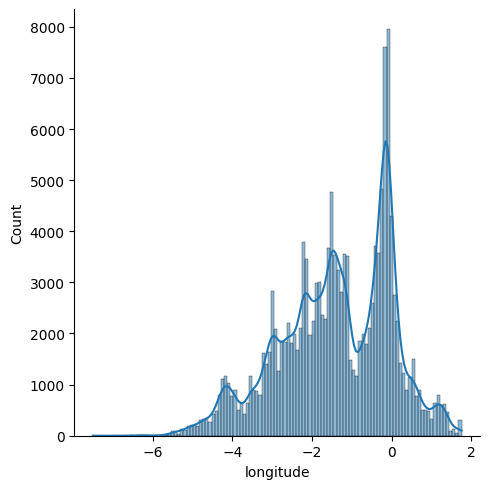

In [101]:
dist_plot(df_accidents_outliers.longitude)

Observing outliers in latitude feature

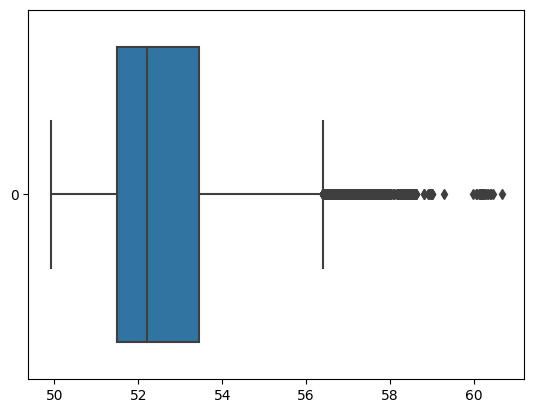

In [102]:
box_plot(df_accidents_outliers.latitude)

In [103]:
print("Feature: latitude")
outlier_report(df_accidents_outliers.latitude)

Feature: latitude
Method: Z-score
Count Of Outliers:  1496 from 151469
Outliers Unique Values [56.908727 56.911447 56.912369 ... 60.391308 60.446017 60.662043]
Percentage Of Outliers:  0.987 %


,count,percentage
57.146807,4,0.00264
57.119930,4,0.00264
57.682927,2,0.00132
57.128203,2,0.00132
57.562394,2,0.00132
...,...,...
57.696276,1,0.00066
57.481850,1,0.00066
57.231805,1,0.00066
57.154256,1,0.00066


In [104]:
print("Feature: latitude")
outlier_report(df_accidents_outliers.latitude,method='iqr')

Feature: latitude
Method: IQR
Count Of Outliers:  2254 from 151469
Outliers Unique Values [56.401986 56.402474 56.403065 ... 60.391308 60.446017 60.662043]
Percentage Of Outliers:  1.488 %


,count,percentage
57.119930,4,0.00264
57.146807,4,0.00264
56.411692,3,0.00198
56.471176,2,0.00132
56.411516,2,0.00132
...,...,...
56.506780,1,0.00066
57.280399,1,0.00066
56.458089,1,0.00066
56.913687,1,0.00066


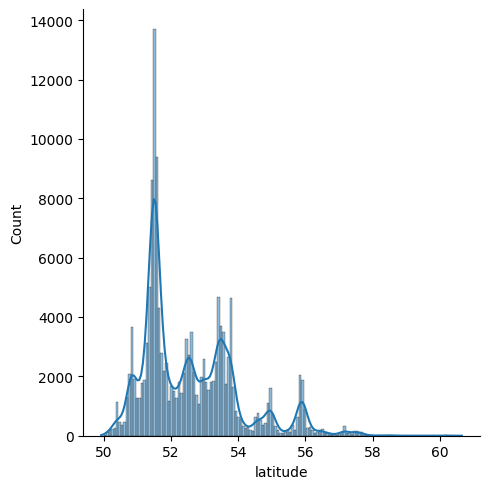

In [105]:
dist_plot(df_accidents_outliers.latitude)

Checking multivirate outliers between longitude and latitude

In [106]:
clf = LocalOutlierFactor()
X = df_accidents_outliers[['longitude','latitude']].values
y_pred = clf.fit_predict(X)

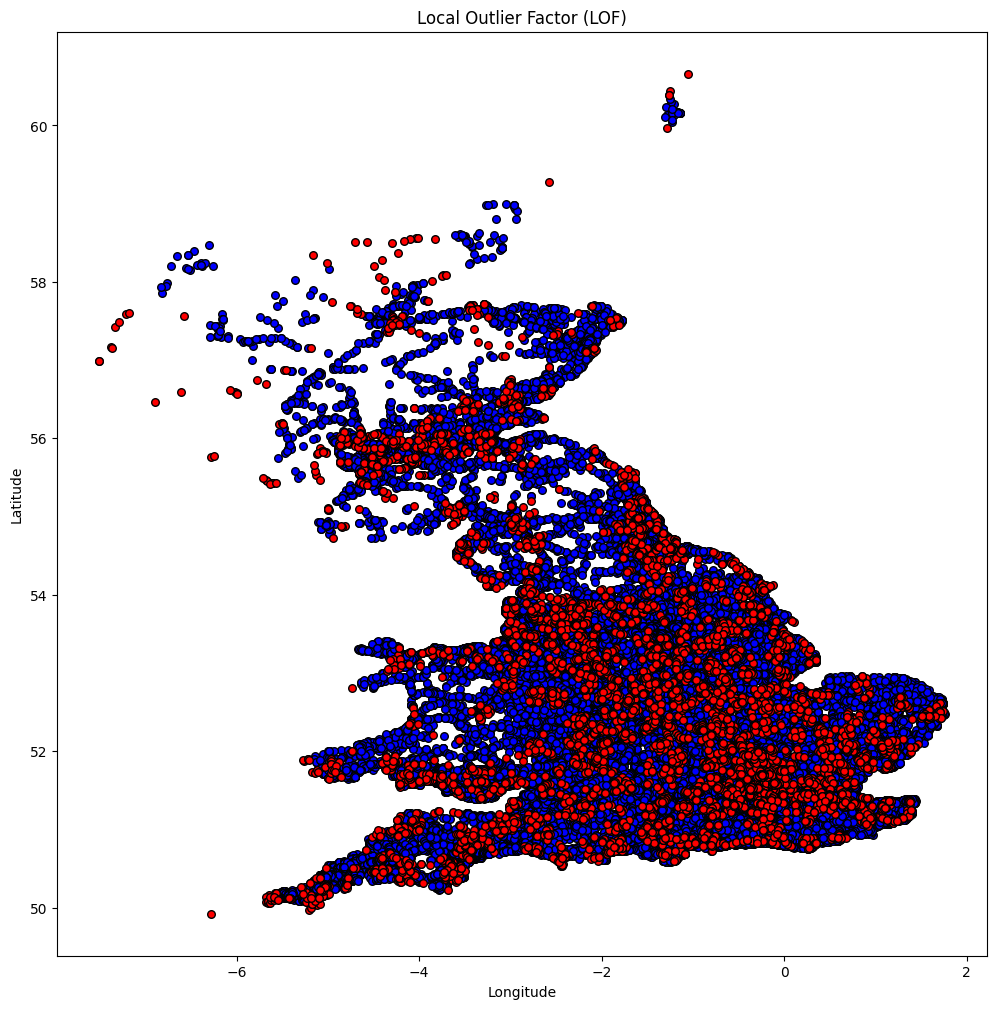

In [107]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')

plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.show()

## Handling outliers

In [108]:
def outliers_bellow_th(report,th = 0.5):
    """
    outputs observation values to be dropped

    Parameter
    _________
    report (pd.DataFrame): output from report function
    th (float): threshold (default = 0.5)

    Return
    ______
    res (list): list of observations
    """

    cumulative_sum = report.sort_index(ascending=False)["percentage"].cumsum()
    res = cumulative_sum[cumulative_sum <= th].index.to_list()
    return res

Picking indices to be dropped based on a threshold

In [109]:
indices_to_be_dropped = set()

vehicles_outliers = outliers_bellow_th(vehicles_report)

indices_to_be_dropped |= set(df_accidents_outliers[df_accidents_outliers["number_of_vehicles"].isin(vehicles_outliers)].index.tolist())

casualities_outliers = outliers_bellow_th(casualties_report)

indices_to_be_dropped |= set(df_accidents_outliers[df_accidents_outliers["number_of_casualties"].isin(casualities_outliers)].index.tolist())

In [110]:
len(indices_to_be_dropped)

846

In [111]:
df_accidents_outliers = df_accidents_outliers.drop(list(indices_to_be_dropped))

## Findings and conclusions

We examined statistical measurement of numerical features. we then decided to examine presence of outliers for number_of_casualties, number_of_vehicles, longitude and latitude using IQR, Z-score and local outlier factor (LOF).
results obtained from z-score and iqr were similar for all attributes except for number_of_casualities which resulted in a significant difference.
Z-score always produced less or equal outliers to IQR so we decided to rely on it.
an attempt to use LOF to investigate the presence of outliers between number_of_casualities and number_of_vehicles togther and longitude and latitude together was successful to detect outliers distance from other points but at the same time it classifed  some point as outliers though they were visibly among othe non outlier observations. hence we decided LOF is not a good measure to rely on in our case.

Description for each feature:
- number_of_casualties: IQR was narrow, only outtliers appeared in higher values (data is right skewed)
- number_of_vehicles: similarly to number_of_casualties, IQR was also narrow and data was right skewed
- longitude: data is left skewed, outliers only appeared on the left side
- latitude: data is right skewed, outliers only appeared on the right side

since number_of_casualties and number_of_vehicles contained outliers realy close to the 50 percentile and other extremly far from the whiskers. dropping all outliers would not make since not all outliers are with close distance to median so we decided to remove furthest observations considered as outliers with a proporion less than specific threshold (0.5). Therefore, we guarantee that extreme values would be dropped and values close to IQR would remain in the data set.

since longitude and latitude are location measurement, we preserved them in case they were needed in further analysis.

# 4 - Data transformation

## 4.1 - Discretization

In [112]:
df_accidents_discretization = df_accidents_outliers.copy()
df_accidents_discretization

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Month,Day,Hour,Minute,longitude,latitude
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,Metropolitan Police,Slight,1,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,...,Urban,Yes,Non-trunk,E01002812,1,13,16,54,-0.192203,51.495766
201101BS70002,2011,Metropolitan Police,Serious,2,1,Tuesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,...,Urban,Yes,Non-trunk,E01002819,1,11,19,45,-0.165408,51.495710
201101BS70003,2011,Metropolitan Police,Slight,1,1,Wednesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,...,Urban,Yes,Non-trunk,E01002914,1,19,17,30,-0.170401,51.489763
201101BS70005,2011,Metropolitan Police,Slight,2,3,Tuesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,...,Urban,Yes,Non-trunk,E01002813,1,25,23,40,-0.194856,51.497875
201101BS70007,2011,Metropolitan Police,Slight,2,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,...,Urban,No,Non-trunk,E01002913,1,6,6,20,-0.182783,51.482671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011984145611,2011,Dumfries and Galloway,Slight,1,1,Saturday,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A(M),...,Rural,Yes,Trunk (Roads managed by Highways England),None,12,17,5,22,-3.495884,55.343306
2011984145911,2011,Dumfries and Galloway,Serious,1,1,Monday,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A,...,Rural,Yes,Non-trunk,None,12,19,7,20,-3.467026,55.223770
2011984146011,2011,Dumfries and Galloway,Slight,2,1,Saturday,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A(M),...,Rural,Yes,Trunk (Roads managed by Highways England),None,12,17,6,0,-3.514288,55.366895


Discretizing date into week numbers

In [113]:
week_number = df_accidents_discretization.apply(lambda row: datetime.datetime(row["accident_year"],row["Month"],row["Day"]).isocalendar()[1],axis=1)
df_accidents_discretization["week_number"] = week_number

Clustering low frequencies together for specific features

In [114]:
def group_low_frequencies(feature,thr = 5):
    """
    For a given feature, reconstruct feature with least 5% frequent observations grouped together

    Parameters
    __________
    feature (pd.Series): feature from the data 
    thr (float): threshold

    Returns
    _______
    observations_less_than_threshold (list): observations bellow thr
    label (str): label to replace returned observations (exists/other)
    """
    threshold = thr / 100
    freq = (feature.value_counts().sort_values())/len(feature)
    observations_less_than_threshold = list(freq.cumsum().loc[lambda x: x<= threshold].index)
    if len(observations_less_than_threshold) != (feature.nunique()-1):
        label = "others"
    else:
        
        label = "exists"
    return observations_less_than_threshold,label


In [115]:
features_to_group_low_freq = ["pedestrian_crossing_human_control","special_conditions_at_site","carriageway_hazards"]

In [116]:
for feature in features_to_group_low_freq:
    if feature in df_accidents_discretization.columns:
        print(feature,"Before: ",df_accidents_discretization[feature].unique())
        observations,imputation_label = group_low_frequencies(df_accidents_discretization[feature])
        df_accidents_discretization.loc[df_accidents_discretization[feature].isin(observations),feature] =\
        imputation_label
        print(feature,"After: ",df_accidents_discretization[feature].unique())
        print("___________________________________")

## 4.11 - Findings and conclusions

- date was discretized by week number 
- unfrequent observations for specific features were clustered together

## 4.2 - Encoding

In [117]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
df_to_be_encoded = df_accidents_discretization.copy()

In [118]:
df_to_be_encoded.head()

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Month,Day,Hour,Minute,longitude,latitude,week_number
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,Metropolitan Police,Slight,1,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,...,Yes,Non-trunk,E01002812,1,13,16,54,-0.192203,51.495766,2
201101BS70002,2011,Metropolitan Police,Serious,2,1,Tuesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,...,Yes,Non-trunk,E01002819,1,11,19,45,-0.165408,51.495710,2
201101BS70003,2011,Metropolitan Police,Slight,1,1,Wednesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,...,Yes,Non-trunk,E01002914,1,19,17,30,-0.170401,51.489763,3
201101BS70005,2011,Metropolitan Police,Slight,2,3,Tuesday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,...,Yes,Non-trunk,E01002813,1,25,23,40,-0.194856,51.497875,4
201101BS70007,2011,Metropolitan Police,Slight,2,1,Thursday,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,...,No,Non-trunk,E01002913,1,6,6,20,-0.182783,51.482671,1


A function that does one hot encoding for a specific feature

In [119]:
def one_hot_encode(feature):
    """
    Returns the result of applying one hot encoding to a single feature

    Paramaters
    __________
    feature: feature to be converted (pd.series)
    colum_labels: new column labels (dict)

    Returns
    ________
    encoded_df: (pd.DataFrame)
    """
    encoded_df = pd.get_dummies(feature,prefix=feature.name)
    return encoded_df

A function that does label encoding for a specific feature and inserts the encoded values into the lookup table

In [120]:
def use_label_encoding(df,feature_name):
    """
    Label Encode Specific Feature

    Parameters
    __________
    feature_name (str): feature name

    Returns
    _______
    None
    """
    
    encoded_feature = label_encode.fit_transform(df[feature_name])
    df[feature_name] = encoded_feature
    return df

A function that does a similar implementation to label encoding for a specific feature but with mapping certain values to certain labels. After that it inserts the encoded values in the lookup table

In [121]:
def label_encoder(feature,values_map):
    """
    Returns the result of applying one hot encoding to a single feature

    Paramaters
    __________
    feature: feature to be converted (pd.series)
    values_map: Values labels (dict)

    Returns
    ________
    feature_encoded: (pd.Series)
    """
    feature_encoded = feature.map(values_map)
    feature_unique_values = feature.unique()
    return feature_encoded

A function that encodes a feature based on a threshold

In [122]:
def encode_features_based_on_threshold(df,col_to_encode, threshold):
    """
    determines the way of encoding a column based on its cardinality

    Parameters
    _________
    col_to_encode (list): list of column names
    threshold (floar): threshold

    Return
    ______
    None

    """
    df_temp = df
    for i in col_to_encode:
        if(len(df_temp[i].unique()) > threshold or len(df_temp[i].unique()) == 2):
            df_temp = use_label_encoding(df_temp,i)
        else:
            df_temp = pd.concat([df_temp.drop(i, axis=1), one_hot_encode(df_temp[i])], axis=1)
    return df_temp

The accident severity column has an ordinal relationship, so it is label encoded using the mapping technique

In [123]:
df_to_be_encoded['accident_severity'] = label_encoder(df_to_be_encoded['accident_severity'],{'Slight':1,'Serious':2,'Fatal':3})

We search for the columns of type object and put them in a list. After that, we pass this list to a method that will do label or one hot encoding to each column in the list based on a threshold. 

In [124]:
def max_columns(df,max_columns = 19):
    """
    for a given dataframe, compute suitable threshold according to 
    features cardinality to limit the number of created columns
    
    Parameters
    __________
    df (pd.DataFrame): dataframe 
    max_columns (int): maximum number of columns (default = 10)

    Return
    ______
    th (int): threshold
    """
    
    th = 0
    df_obj_nunique = df.select_dtypes(['object']).nunique().sort_values()
    for n in df_obj_nunique:
        if n>2:
            max_columns -= n
            if max_columns <0:
                if th == n:
                    th -= 1
                break
            th = n
    return th

In [125]:
col_to_encode = list(df_to_be_encoded.select_dtypes(['object']).columns.copy())

if "lsoa_of_accident_location" in col_to_encode:
    col_to_encode.remove("lsoa_of_accident_location")

df_encoded = encode_features_based_on_threshold(df_to_be_encoded.copy(), col_to_encode, max_columns(df_to_be_encoded))

Observing the new data frame after encoding

In [126]:
df_encoded

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,junction_control_None,junction_control_Stop sign,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Daylight,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,29,1,1,1,4,166,168,90,3,...,0,0,1,0,0,0,0,0,0,1
201101BS70002,2011,29,2,2,1,5,166,168,90,3,...,0,0,1,0,0,0,0,0,0,1
201101BS70003,2011,29,1,1,1,6,166,168,90,2,...,1,0,1,0,0,1,0,0,0,0
201101BS70005,2011,29,1,2,3,5,166,168,90,5,...,0,0,1,0,0,1,0,0,0,0
201101BS70007,2011,29,1,2,1,4,166,168,90,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011984145611,2011,11,1,1,1,2,93,95,51,1,...,1,0,1,0,0,0,0,1,0,0
2011984145911,2011,11,2,1,1,1,93,95,51,0,...,1,0,0,0,1,0,0,1,0,0
2011984146011,2011,11,1,2,1,2,93,95,51,1,...,1,0,0,0,1,0,0,1,0,0


## 4.22 - Findings and conclusions

1. Features that had an ordinal relationship, for example, the accident severity or a binary relationship were label encoded

1. Also, features that had different numbers of categorical values surpassing a specific threshold were label encoded

2. Features that had different numbers of categorical values below a specific threshold were one-hot encoded

4. Threshold was determined by the cardinality of features to limit the number of columns created using one-hot encoding 

## 4.3 - Normalisation 

Most of the features are not numerical data. Only the number of vehicles involved in the accident in addition to the number of casualties are the only columns that are numerical. Since the data values in both columns are nearly concentrated at almost only two values, we consider normalisation not needed at all in this dataset. Moreover, we assume that it will not be needed for other datasets with similar features as we suspect that the densities of the mentioned columns values will significantly change.

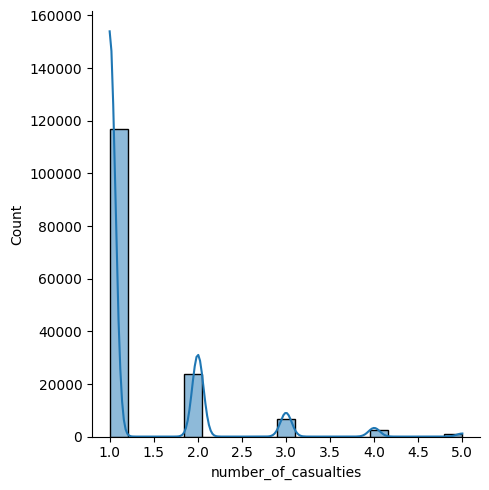

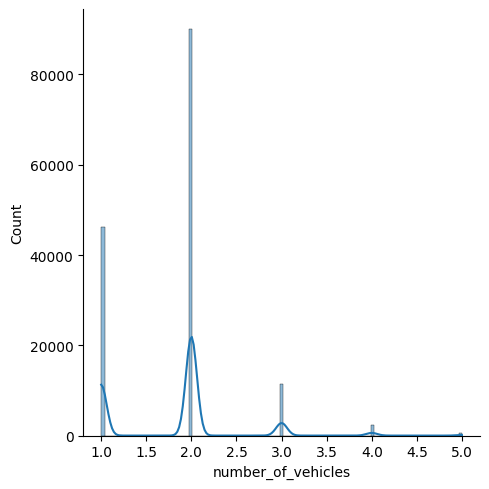

In [127]:
dist_plot(df_accidents_discretization.number_of_casualties)
dist_plot(df_accidents_discretization.number_of_vehicles)

## 4.4 - Adding more columns

Add a column specifying if day is weekend or not

In [128]:
df_encode = df_encoded.assign(weekend = lambda x: (df_accidents_discretization['day_of_week'] == 'Saturday') | (df_accidents_discretization['day_of_week'] == 'Sunday'))
df_encode['weekend'] = df_encode['weekend'].map({True:1, False:0})

for org in  df_encode[df_encode['weekend'] == 1]['day_of_week'].unique():
    insert_record_into_lookup('weekend',org,1)
    
for org in  df_encode[df_encode['weekend'] == 0]['day_of_week'].unique():
    insert_record_into_lookup('weekend',org,0)
    
df_encode['weekend'].unique()

array([0, 1])

Add a column indicating special weather: if raining: 1 , snowing: 2 , or other: 0

In [129]:
special_weather = lambda x: \
1 if "rain" in x.lower() else (2 if "snow" in x.lower() else 0)
df_encode['special_weather'] = df_to_be_encoded['weather_conditions'].apply(special_weather)

for org in  df_encode[df_encode['special_weather'] == 0]["weather_conditions"].unique():
    insert_record_into_lookup('weekspecial_weatherend', org, 0)
for org in  df_encode[df_encode['special_weather'] == 1]["weather_conditions"].unique():
    insert_record_into_lookup('weekspecial_weatherend', org, 1)
for org in  df_encode[df_encode['special_weather'] == 2]["weather_conditions"].unique():
    insert_record_into_lookup('weekspecial_weatherend', org, 2)

df_encode[['special_weather','weather_conditions']]

,special_weather,weather_conditions
accident_index,,
201101BS70001,1,5
201101BS70002,0,1
201101BS70003,0,1
201101BS70005,0,1
201101BS70007,0,1
...,...,...
2011984145611,0,3
2011984145911,1,5
2011984146011,1,5


## 4.4.1 - Findings and conclusions

Two columns were added where one column "weekend" identified if the accident day is a weekend day (Saturday or Sunday --> 1) or not (0).
The other column is "special_condition" specifies if the weather was rainy (1), snowy (2), or other (0).

## 4.5 - Csv file for lookup

Final Form

In [130]:
df_final = df_encode.copy()

Preparing Lookup Table

In [131]:
indices_available = df_final.index.tolist()
df_raw_subset = df_accidents.loc[indices_available]

Including all values transformed from the very first version to the final version

In [132]:
for col in df_raw.columns:
    if col in df_final.columns:
        # feature_name * number_of_rows (series)
        feature_col = pd.Series(col, index=range(len(indices_available)))
        if (not df_final[col].equals(df_raw_subset[col])):
            # columns value changed
            df_compare = pd.DataFrame(pd.concat([df_final[col],df_raw_subset[col]],axis=1)).drop_duplicates().reset_index(drop=True)
            
            df_compare["Feature"] = col
            df_compare.columns = ["Imputed/Encoded","Original Value", "Feature"]
            
            
            df_compare = df_compare[df_compare["Imputed/Encoded"] != df_compare["Original Value"]]
            df_compare = df_compare[df_compare["Imputed/Encoded"].astype(str) != df_compare["Original Value"].astype(str)]
            
            
            lookup_v2 = pd.concat([lookup_v2,df_compare],axis = 0)


Sorting According to feature and imputed values

In [133]:
lookup_v2 = lookup_v2.sort_values(["Feature","Imputed/Encoded"]).reset_index(drop = True)
lookup_v2

,Feature,Original Value,Imputed/Encoded
0,accident_severity,Slight,1
1,accident_severity,Serious,2
2,accident_severity,Fatal,3
3,day_of_week,Friday,0
4,day_of_week,Monday,1
...,...,...,...
1094,weekspecial_weatherend,2,0
1095,weekspecial_weatherend,5,1
1096,weekspecial_weatherend,4,1
1097,weekspecial_weatherend,7,2


Inserting original values corresponding to new values in a list

In [134]:
final_lookup_v2 = pd.DataFrame(lookup_v2.groupby(["Feature","Imputed/Encoded"],as_index = False)["Original Value"].agg(list))

In [135]:
final_lookup_v2

,Feature,Imputed/Encoded,Original Value
0,accident_severity,1,[Slight]
1,accident_severity,2,[Serious]
2,accident_severity,3,[Fatal]
3,day_of_week,0,[Friday]
4,day_of_week,1,[Monday]
...,...,...,...
1079,weekend,0,"[4, 5, 6, 1, 0]"
1080,weekend,1,"[3, 2]"
1081,weekspecial_weatherend,0,"[1, 3, 0, 2]"
1082,weekspecial_weatherend,1,"[5, 4]"


In [136]:
final_lookup_v2.to_csv('Lookup_Table.csv', index=False)

## 5- Exporting the dataframe to a csv file or parquet

In [137]:
df_final.to_csv('Processed_2011_Accidents_UK.csv')

In [138]:
df_final.to_parquet('Processed_2011_Accidents_UK.parquet')

# MS2

In [192]:
df_ms1 = pd.read_csv("Processed_2011_Accidents_UK.csv",index_col=0)
df_ms1.head()

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Daylight,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,weekend,special_weather
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,29,1,1,1,4,166,168,90,3,...,1,0,0,0,0,0,0,1,0,1
201101BS70002,2011,29,2,2,1,5,166,168,90,3,...,1,0,0,0,0,0,0,1,0,0
201101BS70003,2011,29,1,1,1,6,166,168,90,2,...,1,0,0,1,0,0,0,0,0,0
201101BS70005,2011,29,1,2,3,5,166,168,90,5,...,1,0,0,1,0,0,0,0,0,0
201101BS70007,2011,29,1,2,1,4,166,168,90,0,...,1,0,0,0,0,0,0,1,0,0


In [193]:
df_2011_gender = pd.read_csv("df_2011_gender.csv")

In [194]:
df_2011_gender.head()

,accident_index,sex_of_driver
0,201101BS70001,1
1,201101BS70002,1
2,201101BS70002,1
3,201101BS70003,1
4,201101BS70005,1


In [195]:
df_2011_gender.sex_of_driver.value_counts()

1    179953
2     79545
3     16657
Name: sex_of_driver, dtype: int64

1 = Male
2 = Female
3 = Unknown

 

In [197]:
df_2011_gender["males"]= np.where(df_2011_gender["sex_of_driver"]== 1,1,0);

In [198]:
df_2011_gender["females"] = np.where(df_2011_gender["sex_of_driver"]== 2,1,0);

In [199]:
df_2011_gender["unknown_gender"] = np.where(df_2011_gender["sex_of_driver"]== 3,1,0);

In [200]:
df_2011_gender

,accident_index,sex_of_driver,males,females,unknown_gender
0,201101BS70001,1,1,0,0
1,201101BS70002,1,1,0,0
2,201101BS70002,1,1,0,0
3,201101BS70003,1,1,0,0
4,201101BS70005,1,1,0,0
...,...,...,...,...,...
276150,2011984145911,2,0,1,0
276151,2011984146011,1,1,0,0
276152,2011984146011,1,1,0,0
276153,2011984146411,2,0,1,0


In [204]:
df_2011_gender_grouped = df_2011_gender.groupby(df_2011_gender["accident_index"])["males","females","unknown_gender"].sum()

/tmp/ipykernel_273/3380132114.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2011_gender_grouped = df_2011_gender.groupby(df_2011_gender["accident_index"])["males","females","unknown_gender"].sum()


In [205]:
df_2011_gender_grouped

,males,females,unknown_gender
accident_index,,,
201101BS70001,1,0,0
201101BS70002,2,0,0
201101BS70003,1,0,0
201101BS70005,2,0,0
201101BS70007,2,0,0
...,...,...,...
2011984145611,1,0,0
2011984145911,0,1,0
2011984146011,2,0,0


In [206]:
df_merged = pd.merge(df_ms1, df_2011_gender_grouped,left_index = True, right_index= True,how="left")
df_merged.head()

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,weekend,special_weather,males,females,unknown_gender
accident_index,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,29,1,1,1,4,166,168,90,3,...,0,0,0,0,1,0,1,1,0,0
201101BS70002,2011,29,2,2,1,5,166,168,90,3,...,0,0,0,0,1,0,0,2,0,0
201101BS70003,2011,29,1,1,1,6,166,168,90,2,...,1,0,0,0,0,0,0,1,0,0
201101BS70005,2011,29,1,2,3,5,166,168,90,5,...,1,0,0,0,0,0,0,2,0,0
201101BS70007,2011,29,1,2,1,4,166,168,90,0,...,0,0,0,0,1,0,0,2,0,0


Checking For Missing Values

In [207]:
df_merged.isna().sum()

accident_year                                   0
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
day_of_week                                     0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
speed_limit                                     0
junction_detail                                 0
second_road_class                               0
second_road_number                              0
pedestrian_crossing_physical_facilities         0
weather_conditions                              0
urban_or_rural_area                             0
did_police_officer_attend_scene_of_accident     0
trunk_road_flag                                 0


## Gender Analysis

### 1) Accident Severity Per Gender

In [218]:
df_merged_per_severity = df_merged.groupby("accident_severity")["females","males","unknown_gender"].sum()
df_merged_per_severity

/tmp/ipykernel_273/3182280891.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merged_per_severity = df_merged.groupby("accident_severity")["females","males","unknown_gender"].sum()


,females,males,unknown_gender
accident_severity,,,
1,70158,150745,14436
2,8043,24491,1871
3,531,2378,95


In [224]:
df_merged_per_severity.iloc[0,:]

females            70158
males             150745
unknown_gender     14436
Name: 1, dtype: int64

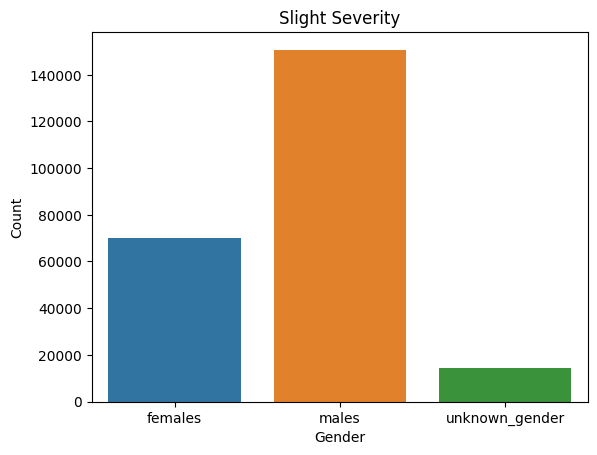

In [228]:
sns.barplot(x = df_merged_per_severity.iloc[0,:].index, y= df_merged_per_severity.iloc[0,:])
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title("Slight Severity");

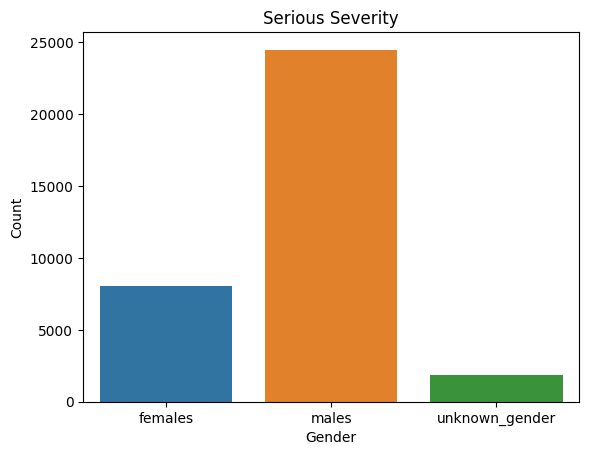

In [230]:
sns.barplot(x = df_merged_per_severity.iloc[1,:].index, y= df_merged_per_severity.iloc[1,:])
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title("Serious Severity");

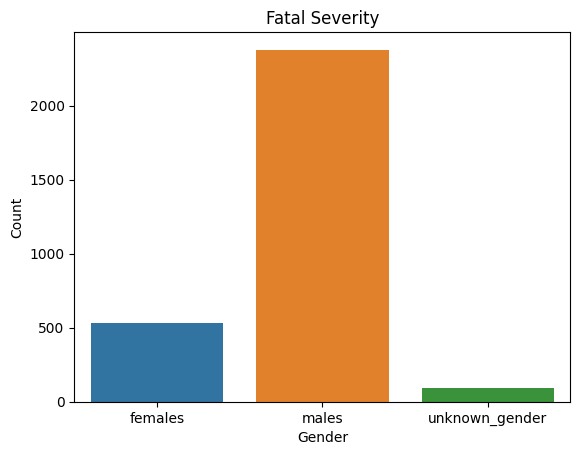

In [229]:
sns.barplot(x = df_merged_per_severity.iloc[2,:].index, y= df_merged_per_severity.iloc[2,:])
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title("Fatal Severity");

Vizualizations show that males were involved in more accidents than other gender. Also, as the accident severity increases from slight to fatal, the ratio between males and females increases. 

### 2) What is the percentage of accidents according to lighting conditions made by both genders?

In [233]:
lookuptable = pd.read_csv("Lookup_Table.csv")
lookuptable

,Feature,Imputed/Encoded,Original Value
0,accident_severity,1,['Slight']
1,accident_severity,2,['Serious']
2,accident_severity,3,['Fatal']
3,day_of_week,0,['Friday']
4,day_of_week,1,['Monday']
...,...,...,...
1079,weekend,0,"[4, 5, 6, 1, 0]"
1080,weekend,1,"[3, 2]"
1081,weekspecial_weatherend,0,"[1, 3, 0, 2]"
1082,weekspecial_weatherend,1,"[5, 4]"


In [238]:
df_merged[["light_conditions_Darkness - lights lit","light_conditions_Darkness - lights unlit","light_conditions_Daylight"]]

,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Daylight
accident_index,,,
201101BS70001,1,0,0
201101BS70002,1,0,0
201101BS70003,1,0,0
201101BS70005,1,0,0
201101BS70007,1,0,0
...,...,...,...
2011984145611,1,0,0
2011984145911,0,0,1
2011984146011,0,0,1


In [245]:
group_by_lit = df_merged.groupby("light_conditions_Darkness - lights lit")["females","males"].sum().iloc[1]
group_by_unlit = df_merged.groupby("light_conditions_Darkness - lights unlit")["females","males"].sum().iloc[1]
group_by_daylight = df_merged.groupby("light_conditions_Daylight")["females","males"].sum().iloc[1]

/tmp/ipykernel_273/417552182.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_by_lit = df_merged.groupby("light_conditions_Darkness - lights lit")["females","males"].sum().iloc[1]
/tmp/ipykernel_273/417552182.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_by_unlit = df_merged.groupby("light_conditions_Darkness - lights unlit")["females","males"].sum().iloc[1]
/tmp/ipykernel_273/417552182.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_by_daylight = df_merged.groupby("light_conditions_Daylight")["females","males"].sum().iloc[1]


In [256]:
pielabels = ["Daylight", "Darkness Unlit", "Darkness Lit"]

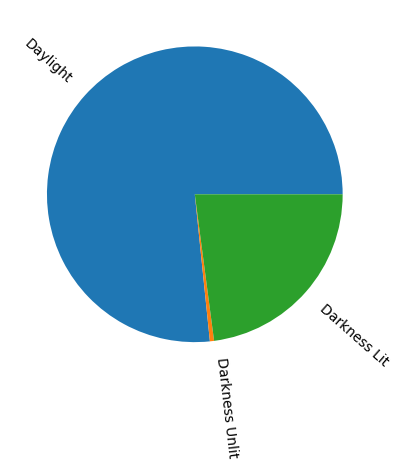

In [262]:
plt.pie([group_by_daylight.males,group_by_unlit.males,group_by_lit.males],labels = pielabels,rotatelabels = True);

The least number of accidents is made by males is during night when there are no lights, indicating that very few people drive at night in areas without lights. The most accidents occurs during daylight indicating that most people drive during daylight.

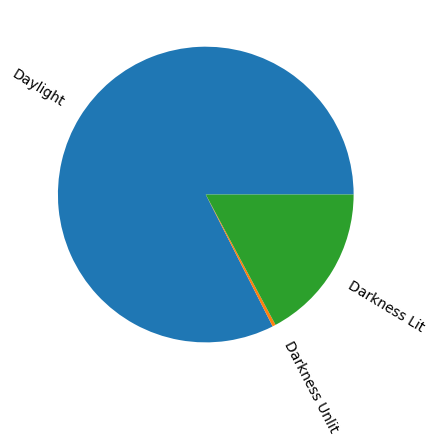

In [263]:
plt.pie([group_by_daylight.females,group_by_unlit.females,group_by_lit.females],labels = pielabels,rotatelabels=True);

The observations for males apply also for females, even thought that the percentage of accidents in darkness is less than that of male, indicating that fewer females drive during night.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=788e7d6f-7077-4dfb-8de9-e5a17fa48e8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>